In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Data set information

gender : sex of student   
race/ethnicity : ethicity group (A , B, C , D )  
parental level of education : parent's final or last education    
lunch : before test doing lunch or not   
test preparation course : complete course before test or  not    
math score    
reading score   
writing score   

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()  ## no rows are same 

## if duplicate data is there 
# df.drop_duplicates()
#         or
# df.drop_duplicates(keep='last')

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight 

1. all data's mean is very close from 66 to 69
2. all data's standard deviation is also close from 14 to 15.5
3. while there is a min math score is 0 reading min is 17 and writing min is 10 

In [10]:
print(pd.unique(df['gender']))
print(pd.unique(df['race_ethnicity']))
print(pd.unique(df['parental_level_of_education']))
print(pd.unique(df['lunch']))
print(pd.unique(df['test_preparation_course']))

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [11]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype!= 'O']
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [12]:
print("we have {} numeric feature : {}".format(len(numeric_feature) , numeric_feature))
print("we have {} categorical feature : {}".format(len(cat_feature) , cat_feature))

we have 3 numeric feature : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df['Total_score'] = df["math_score"] +  df['reading_score'] + df['writing_score']
df['Avg_score'] = df['Total_score'] / 3

In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['Avg_score'].count()
writing_full = df[df['writing_score'] == 100]['Avg_score'].count()
math_full = df[df['math_score'] == 100]['Avg_score'].count()


print(f"number of student getting full marks in maths is  {math_full}")
print(f"number of student getting full marks in reading is  {reading_full}")
print(f"number of student getting full marks in writing is  {writing_full}")



number of student getting full marks in maths is  7
number of student getting full marks in reading is  17
number of student getting full marks in writing is  14


In [16]:
reading_less_20= df[df['reading_score'] <= 20]['Avg_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Avg_score'].count()
math_less_20 = df[df['math_score'] <= 20]['Avg_score'].count()


print(f"number of student getting less than 20 marks in maths is  {math_less_20}")
print(f"number of student getting less than 20 marks in reading is  {reading_less_20}")
print(f"number of student getting less than marks in writing is  {writing_less_20}")


number of student getting less than 20 marks in maths is  4
number of student getting less than 20 marks in reading is  1
number of student getting less than marks in writing is  3


### Insights

1. Worst performance in maths 
2. best performance in reading

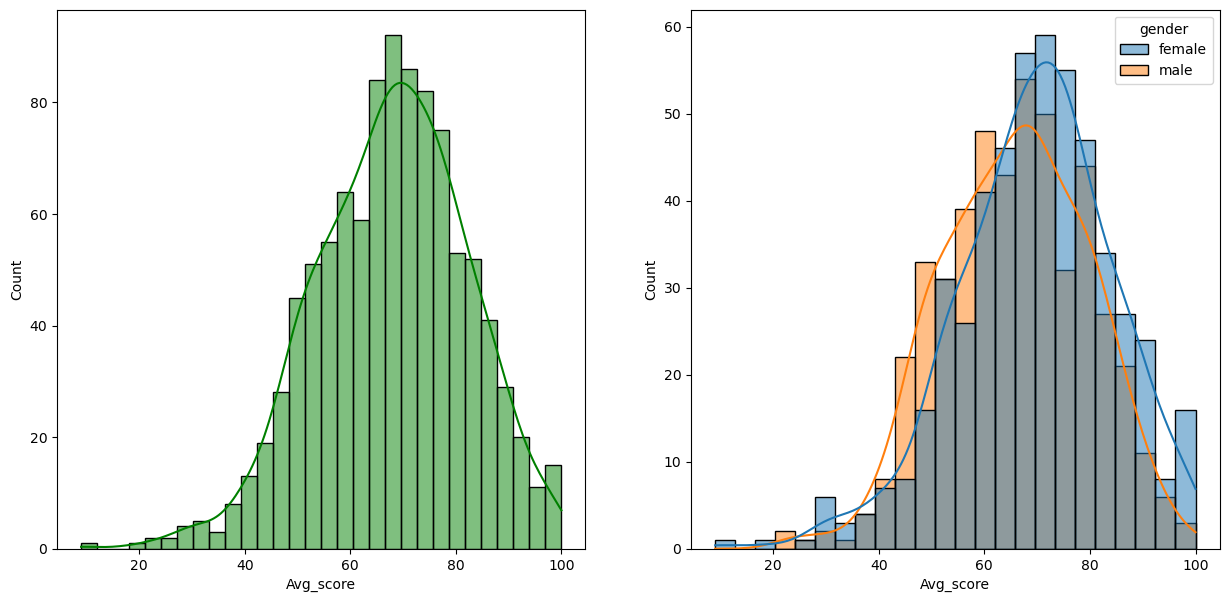

In [17]:
fig , axs = plt.subplots(1 , 2, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
sns.histplot(data = df , x = "Avg_score" , bins = 30 , kde=True , color='g')
plt.subplot(1 , 2 , 2)
sns.histplot(data = df , x = "Avg_score" , kde = True , hue="gender")
plt.show()

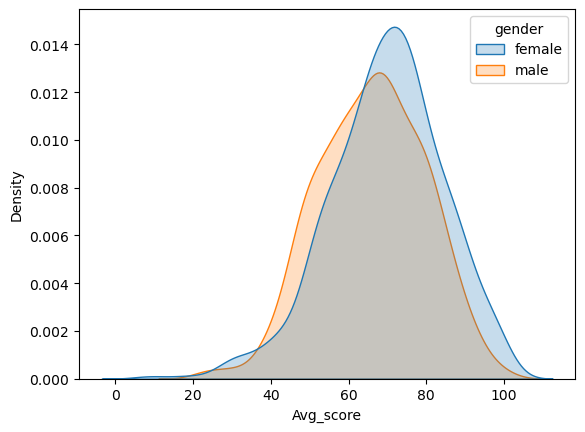

In [18]:
sns.kdeplot(data=df, x="Avg_score", hue="gender", fill=True)
plt.show()

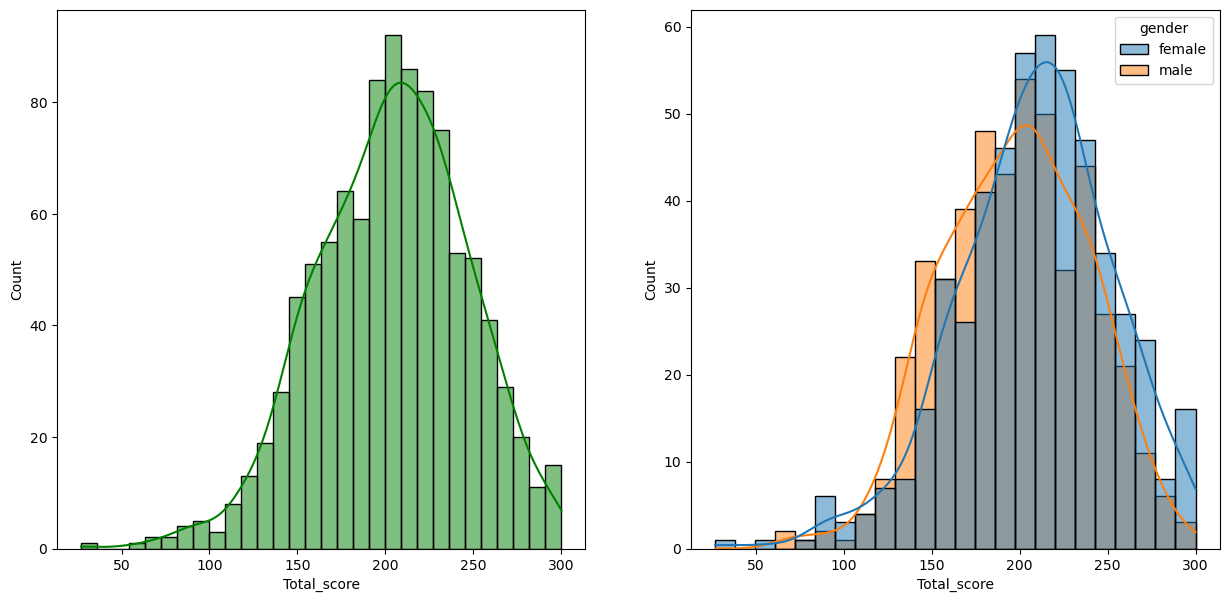

In [19]:
fig , axs = plt.subplots(1 , 2, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
sns.histplot(data = df , x = "Total_score" , bins = 30 , kde=True , color='g')
plt.subplot(1 , 2 , 2)
sns.histplot(data = df , x = "Total_score" , kde = True , hue="gender")
plt.show()

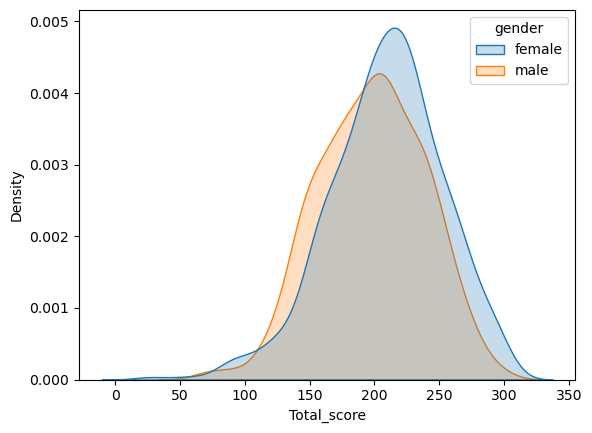

In [20]:
sns.kdeplot(data=df, x="Total_score",  hue="gender", fill=True)
plt.show()

### Insights 

- Female students are  tend to perform well then male students 


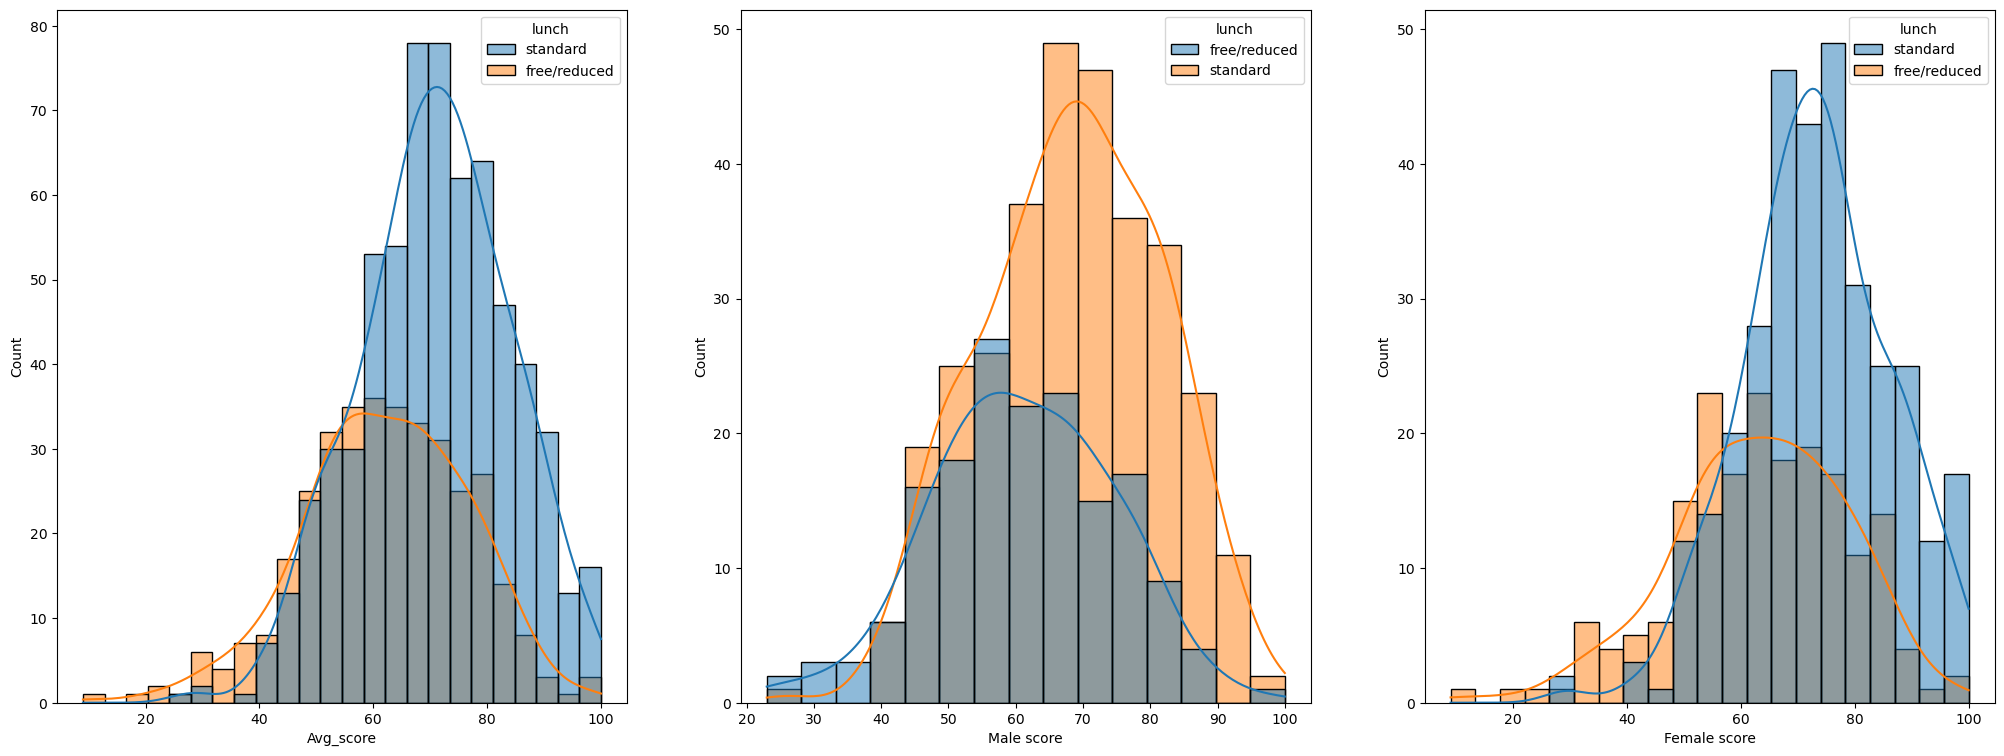

In [21]:
plt.subplots(1 , 3 , figsize = (25 , 9))
plt.subplot(131)
sns.histplot(data = df , x = 'Avg_score', kde = True  , hue = "lunch")
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'] , x = 'Avg_score' , kde = True , hue = 'lunch')
plt.xlabel("Male score")
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'] ,x = "Avg_score", kde = True , hue = 'lunch')
plt.xlabel("Female score")
plt.show()

### Insights 

- wheather it is score of male or female standard lunch helps them for better score 

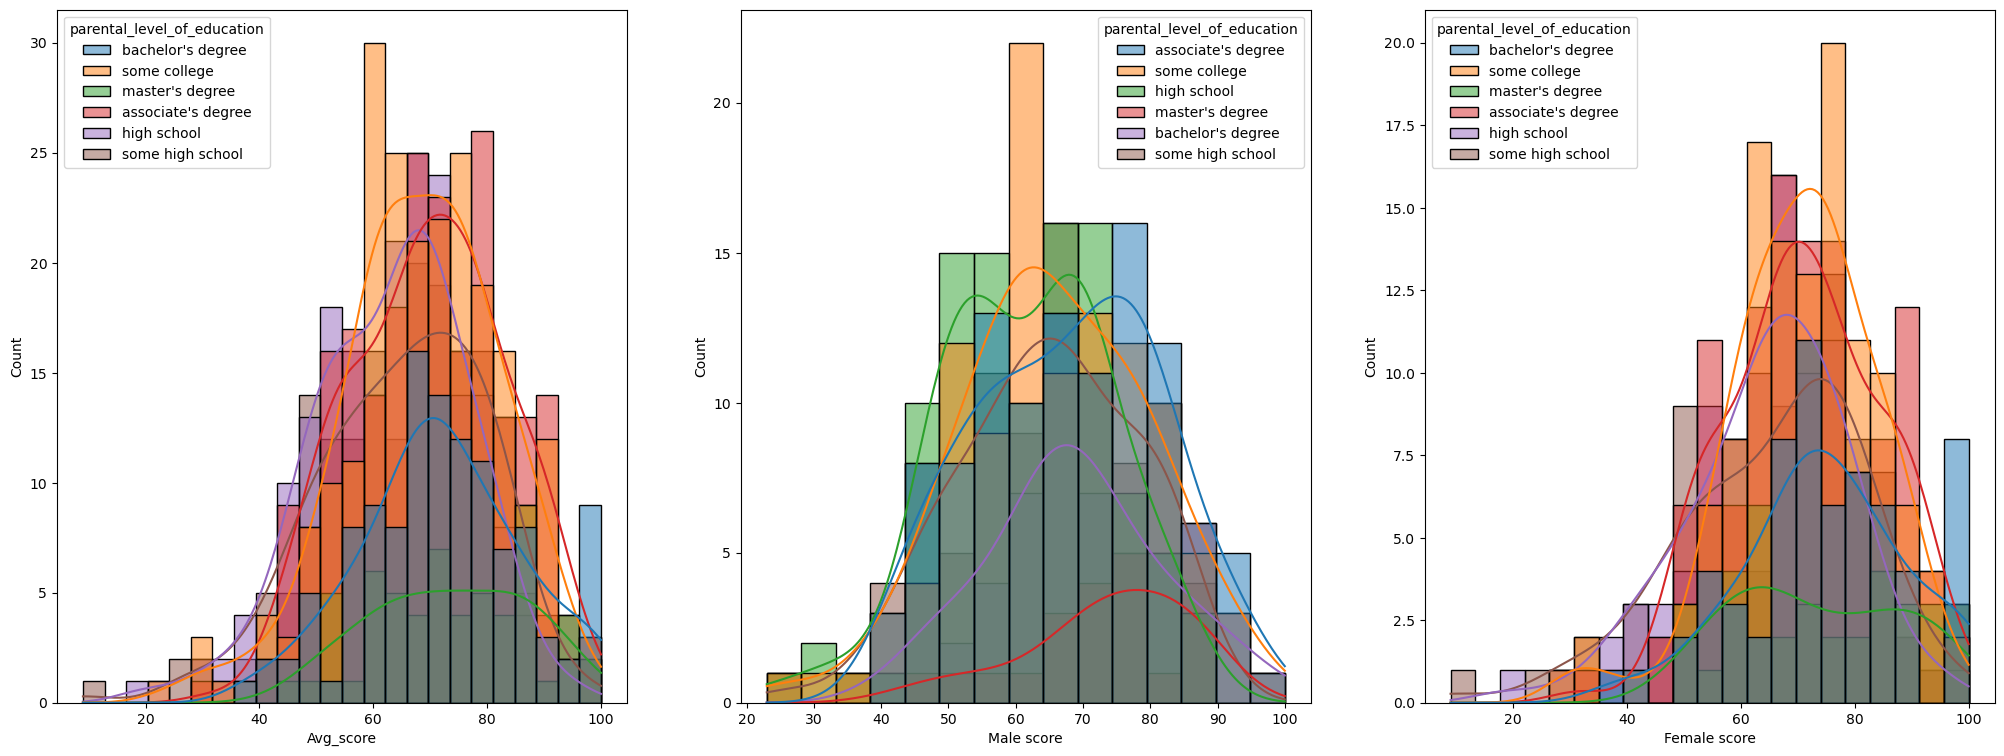

In [22]:
plt.subplots(1 , 3 , figsize = (25 , 9))
plt.subplot(131)
sns.histplot(data = df , x = 'Avg_score', kde = True  , hue = "parental_level_of_education")
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'] , x = 'Avg_score' , kde = True , hue = 'parental_level_of_education')
plt.xlabel("Male score")
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'] ,x = "Avg_score", kde = True , hue = 'parental_level_of_education')
plt.xlabel("Female score")
plt.show()

### Insights 

- in general no effect of parent level education on students also same for females    
- for males if associates degree and master's degree tend to perform well in exam 

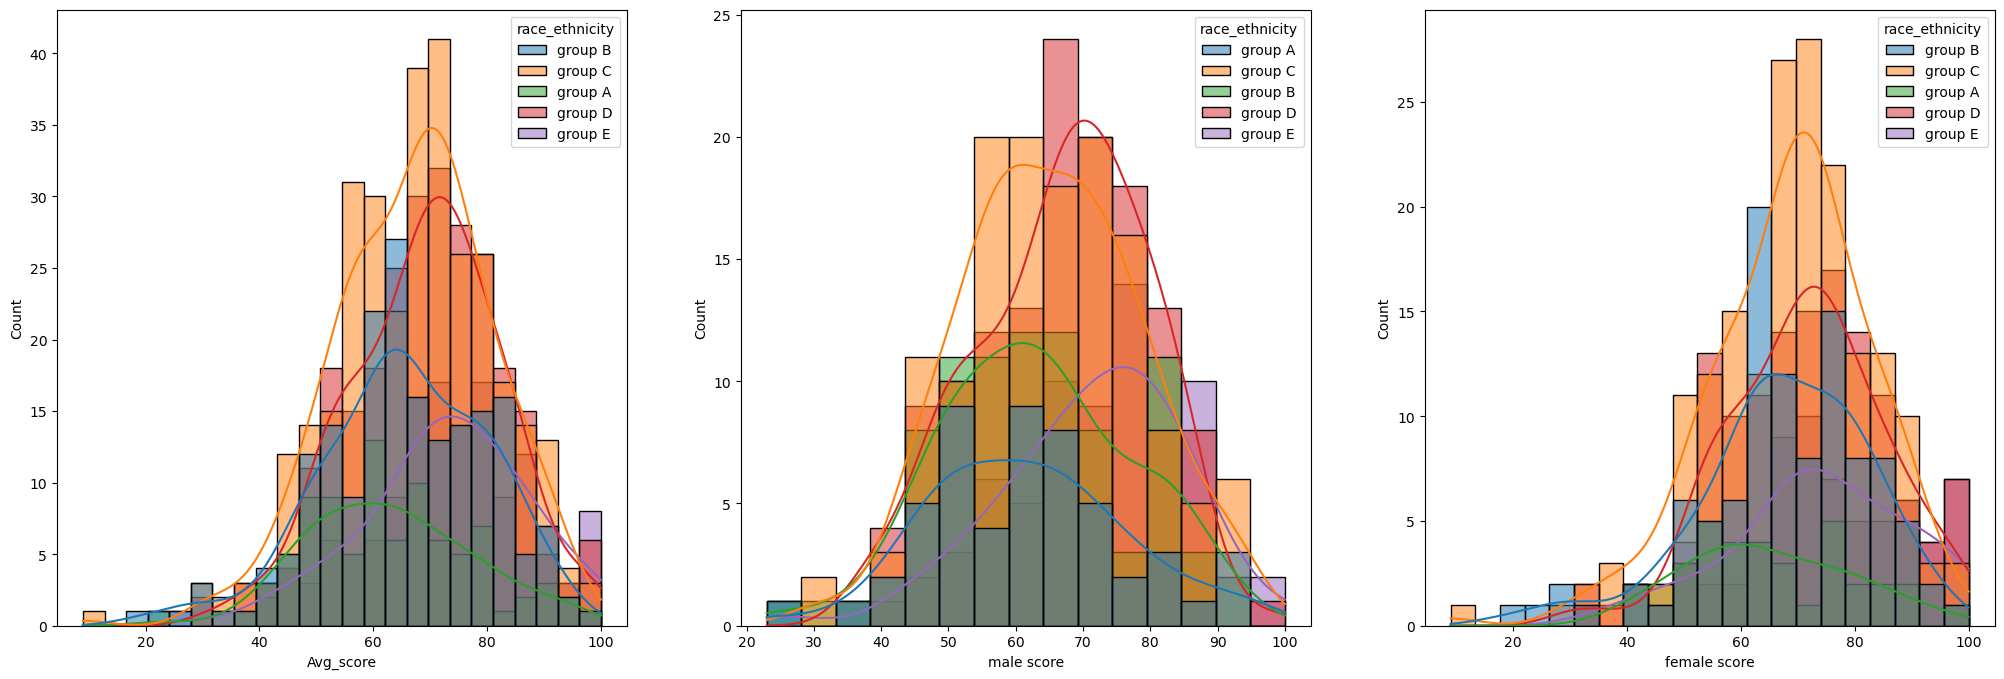

In [23]:
plt.subplots(1 , 3 , figsize = (25 , 8))
plt.subplot(131)
sns.histplot(data = df , kde = True , hue = 'race_ethnicity' , x = 'Avg_score')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'] , kde = True , hue = 'race_ethnicity' , x = 'Avg_score')
plt.xlabel("male score")
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'] , kde = True , hue = 'race_ethnicity' , x = 'Avg_score')
plt.xlabel("female score")
plt.show()

### Insights 

- in general group a or b have more tend to perform poor in exam   
- in male or female irrespectively of group a or b have more tend to perform poor in exam


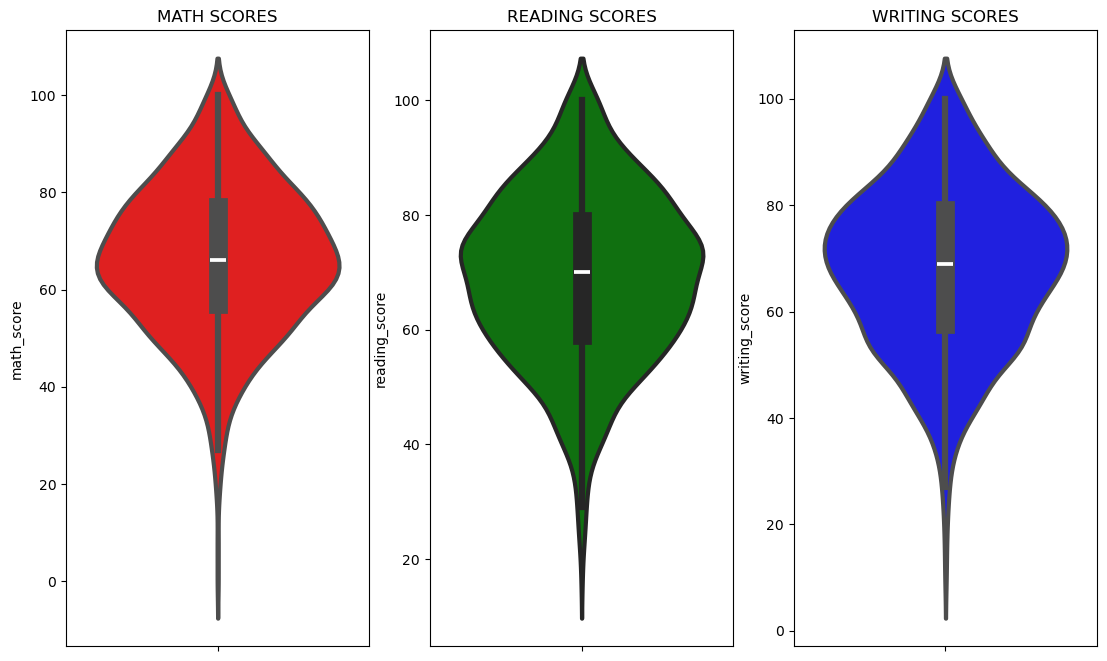

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights 

- as we can see here most of student get marks between 60-80 in math   
- in reading and writing most student got marks between 50 - 80 


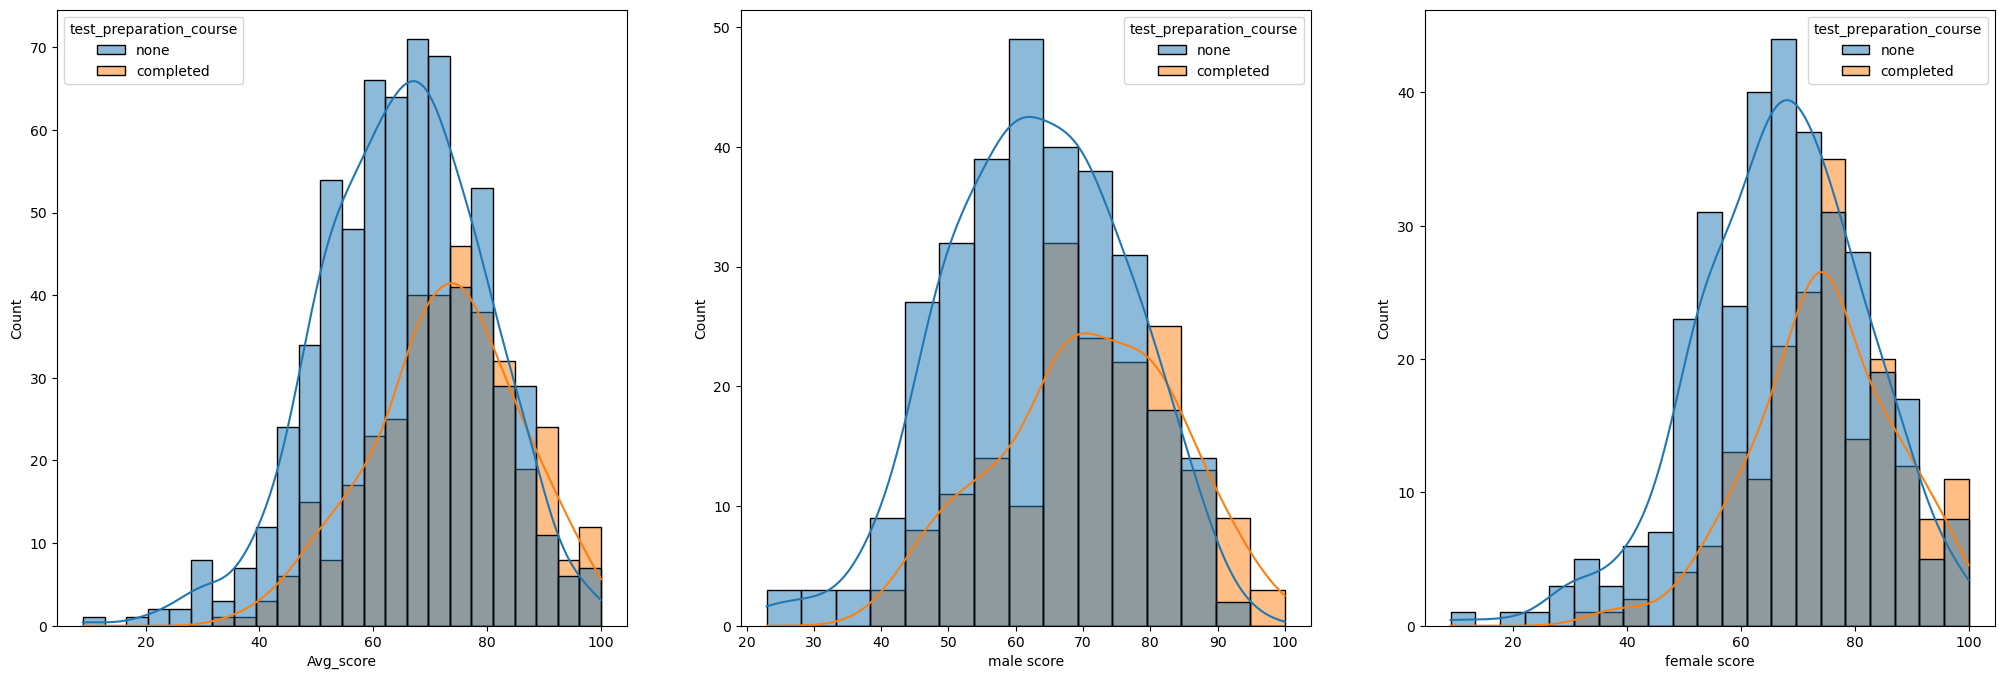

In [25]:
plt.subplots(1 , 3 , figsize = (25 , 8))
plt.subplot(131)
sns.histplot(data = df , kde = True , hue = 'test_preparation_course' , x = 'Avg_score')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'] , kde = True , hue = 'test_preparation_course' , x = 'Avg_score')
plt.xlabel("male score")
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'] , kde = True , hue = 'test_preparation_course' , x = 'Avg_score')
plt.xlabel("female score")
plt.show()

### Insighor 

- for every case complete course are performing well

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

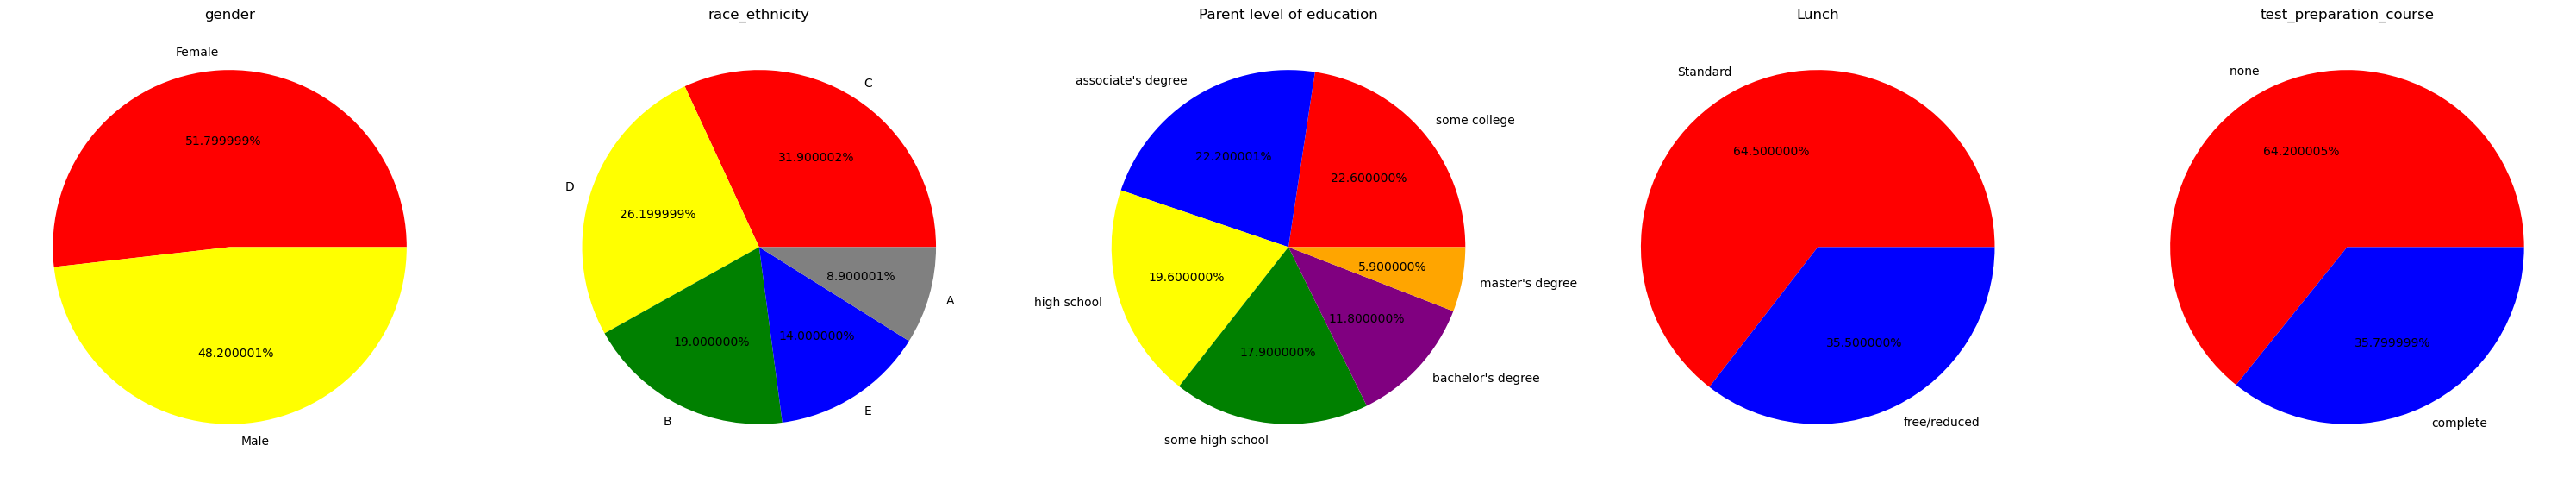

In [28]:
plt.rcParams['figure.figsize'] = (30 , 12)

size = df['gender'].value_counts()
color = ['red' , 'yellow']
labels = 'Female' , 'Male'
plt.subplot(1 , 5 , 1)
plt.pie(size , colors = color , labels=labels , autopct="%2f%%")
plt.title("gender")
plt.axis('off')

size = df['race_ethnicity'].value_counts()
color = ['red' , 'yellow' , 'green' , 'blue' , 'gray']
labels = 'C' , 'D' , 'B' , 'E' , 'A'

plt.subplot(1 , 5 , 2)
plt.pie(size , colors = color  , labels = labels  , autopct = "%2f%%")
plt.title('race_ethnicity')
plt.axis('off')


size = df['parental_level_of_education'].value_counts()
color =['red' , 'blue' , 'yellow' , 'green' , 'purple' , 'orange']
labels = 'some college' , 'associate\'s degree' , 'high school' , 'some high school' , 'bachelor\'s degree' , 'master\'s degree'

plt.subplot(1 , 5 , 3)
plt.pie (size , colors = color , labels= labels , autopct = '%2f%%')
plt.title('Parent level of education')
plt.axis('off')


size = df['lunch'].value_counts()
labels = 'Standard' , 'free/reduced' 
colors = ['red' , 'yellow']

plt.subplot(1 , 5 , 4)
plt.pie (size , labels = labels , colors=color , autopct='%2f%%')
plt.title('Lunch')
plt.axis('off')


size = df['test_preparation_course'].value_counts()
labels = 'none ' , 'complete'
colors = ['red' , 'yellow']

plt.subplot(1 , 5 , 5)
plt.pie (size , labels = labels , colors=color , autopct='%2f%%')
plt.title('test_preparation_course')
plt.axis ('off')


plt.tight_layout()
plt.grid()
plt.show()





#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

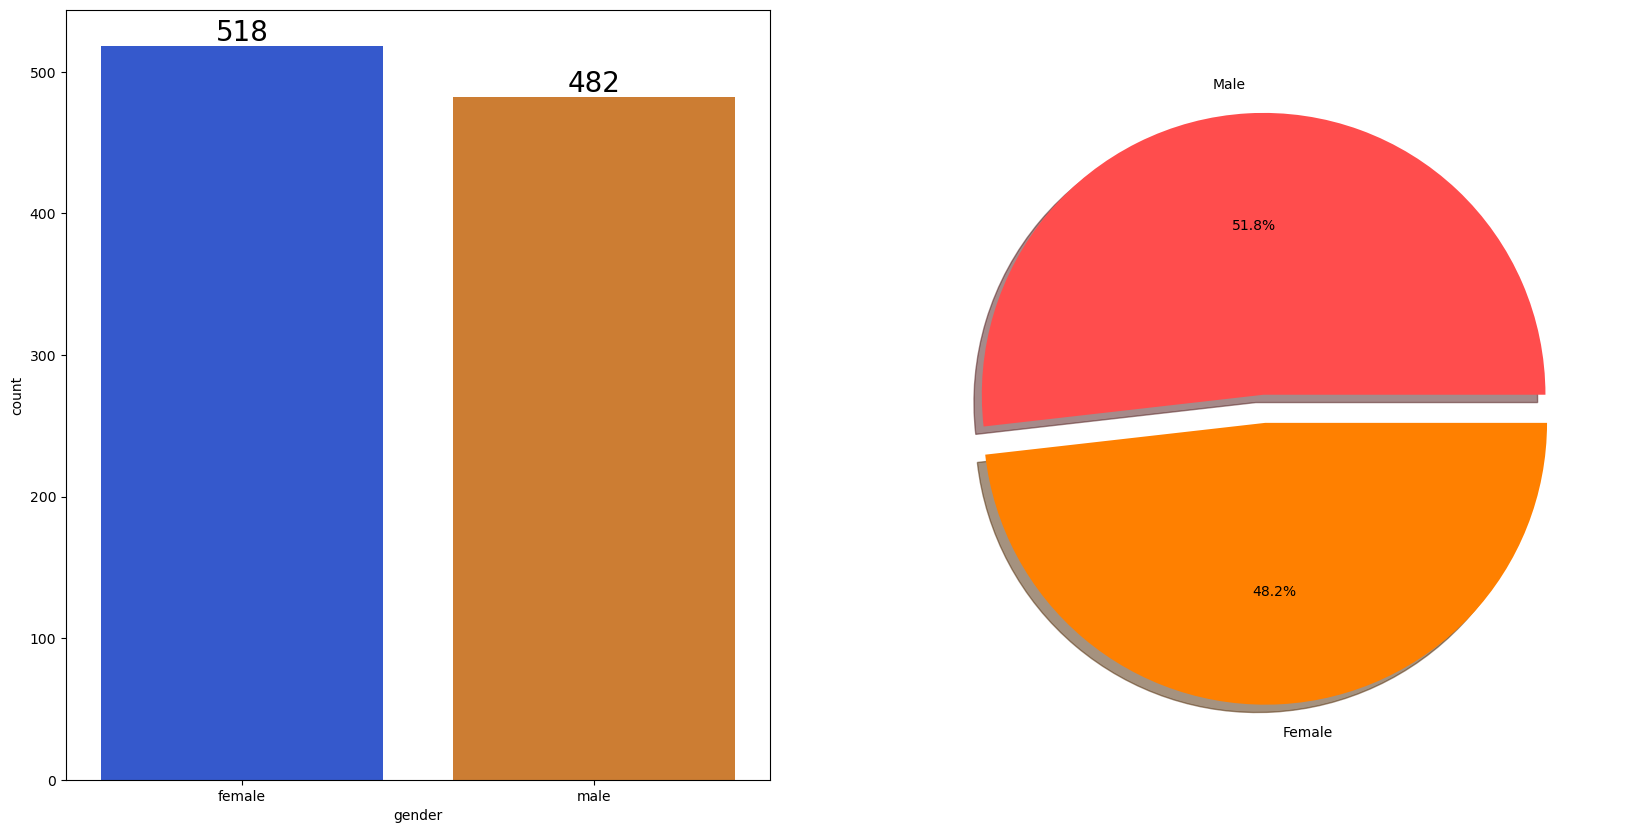

In [70]:
f,ax=plt.subplots(1,2,figsize=(20,10))  ## suppose here fig is notebook page and ax is no. of graphs in page 
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.6)
for container in ax[0].containers:   ## containers are contained bar or features i.e. ['male' , 'female']
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [30]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,Total_score,Avg_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [63]:
female_score = [gender_group['Avg_score'][0] , gender_group['math_score'][0]  , gender_group['reading_score'][0] , gender_group['writing_score'][0]]
male_score = [gender_group['Avg_score'][1] , gender_group['math_score'][1] , gender_group['reading_score'][1]   , gender_group['writing_score'][1]]

In [64]:
female_score

[np.float64(69.56949806949807),
 np.float64(63.633204633204635),
 np.float64(72.60810810810811),
 np.float64(72.46718146718146)]

In [65]:
male_score

[np.float64(65.8374827109267),
 np.float64(68.72821576763485),
 np.float64(65.47302904564316),
 np.float64(63.31120331950208)]

In [68]:
x = ['Total_score' , 'Math Average' , 'reading_score' , 'writing_score']
x_axis = np.arange(len(x))
x_axis

array([0, 1, 2, 3])

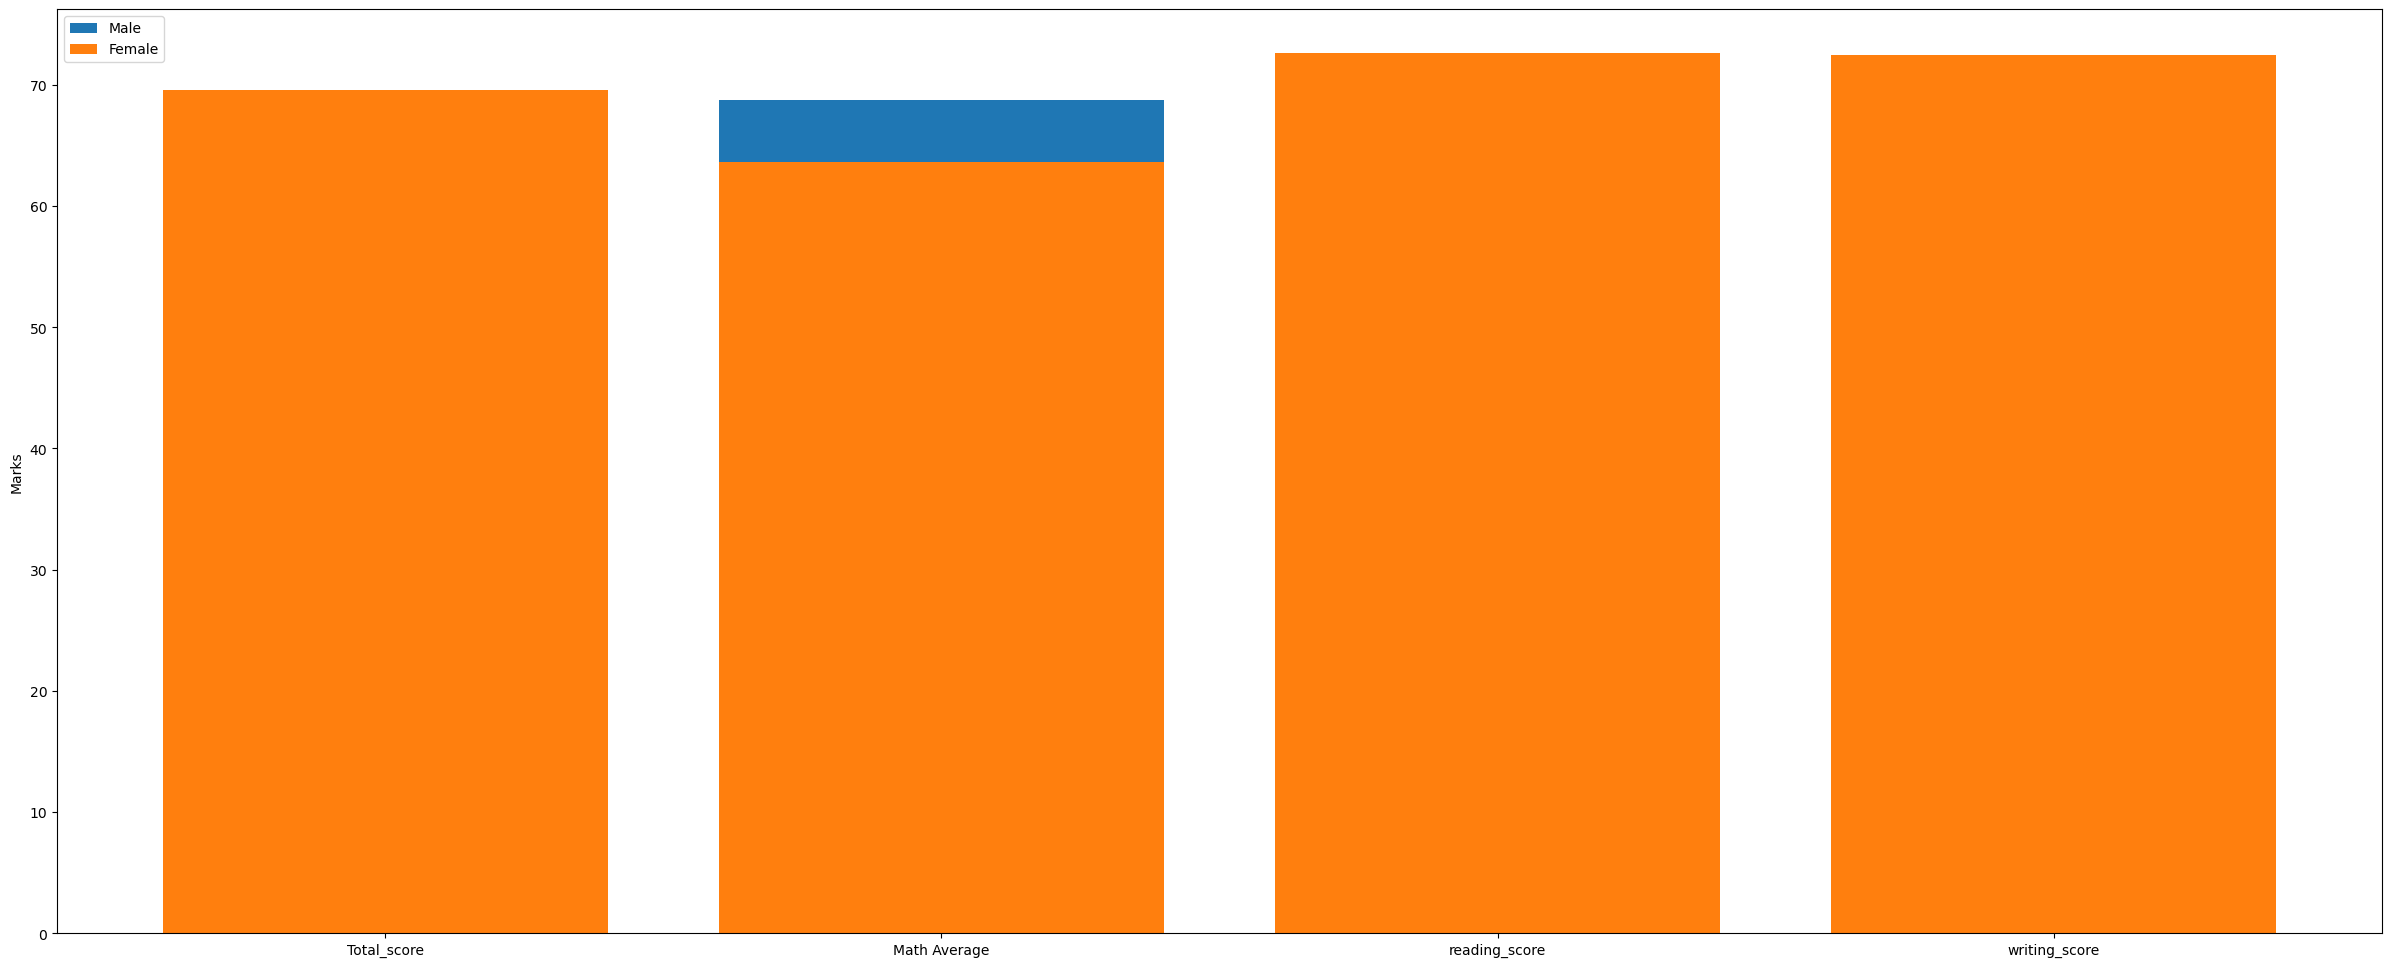

In [69]:
plt.bar(x_axis  , male_score   ,  label = 'Male')
plt.bar(x_axis , female_score  ,  label = 'Female')
plt.xticks(x_axis , x)
plt.ylabel('Marks')
plt.legend()
plt.show()

### Insights 
- overall average score is same for both 
- but males have better maths score than females in math only


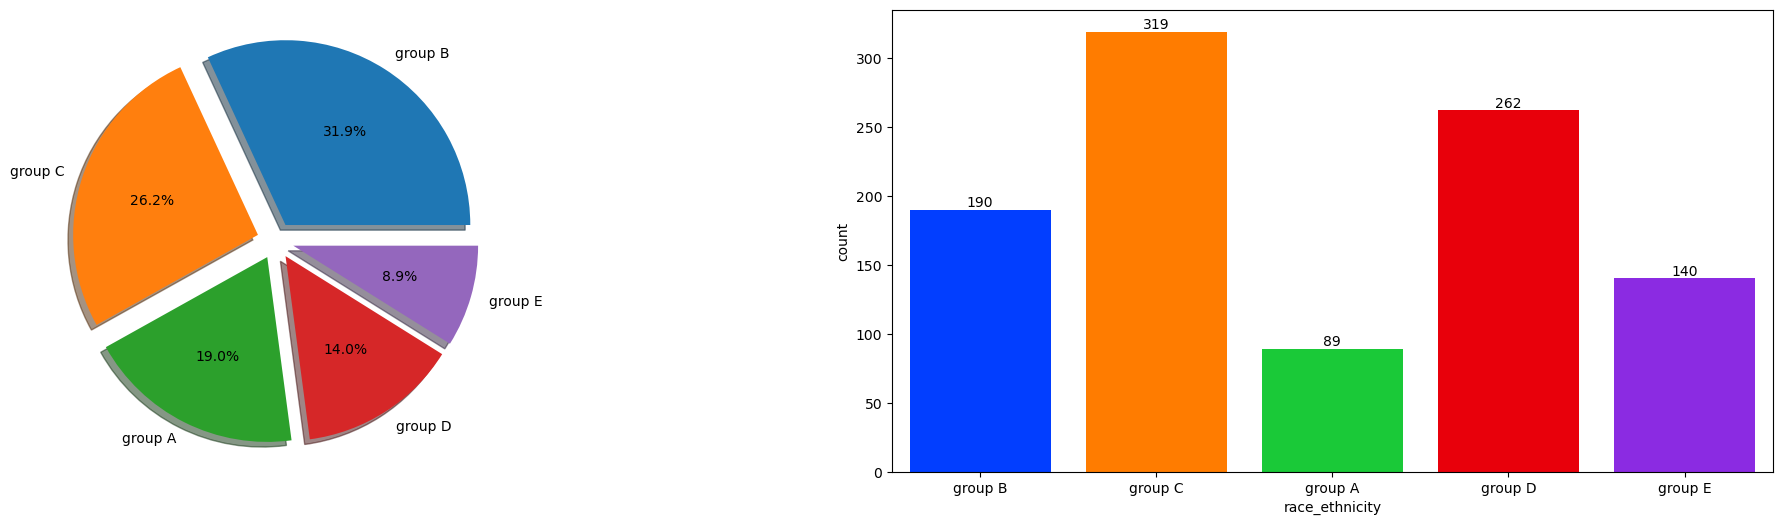

In [90]:
f , ax = plt.subplots(1 , 2 , figsize = (25 , 6))
sns.countplot(data = df , x = df['race_ethnicity']  , palette='bright' , ax = ax[1] , saturation=1)
for container in ax[1].containers:
    ax[1].bar_label(container , color = 'black' ,size = 10)

ax[0].pie(x=df['race_ethnicity'].value_counts(),labels=['group B','group C','group A','group D','group E'],explode = [0.1 , 0.1 , 0.1 ,0.1 , 0.1],autopct='%1.1f%%',shadow=True)
plt.show()

### Insights 

- most of students are from group c and d 
- least students are from grpup a


In [91]:
group_group = df.groupby('race_ethnicity').mean(numeric_only=True)
group_group

,math_score,reading_score,writing_score,Total_score,Avg_score
race_ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


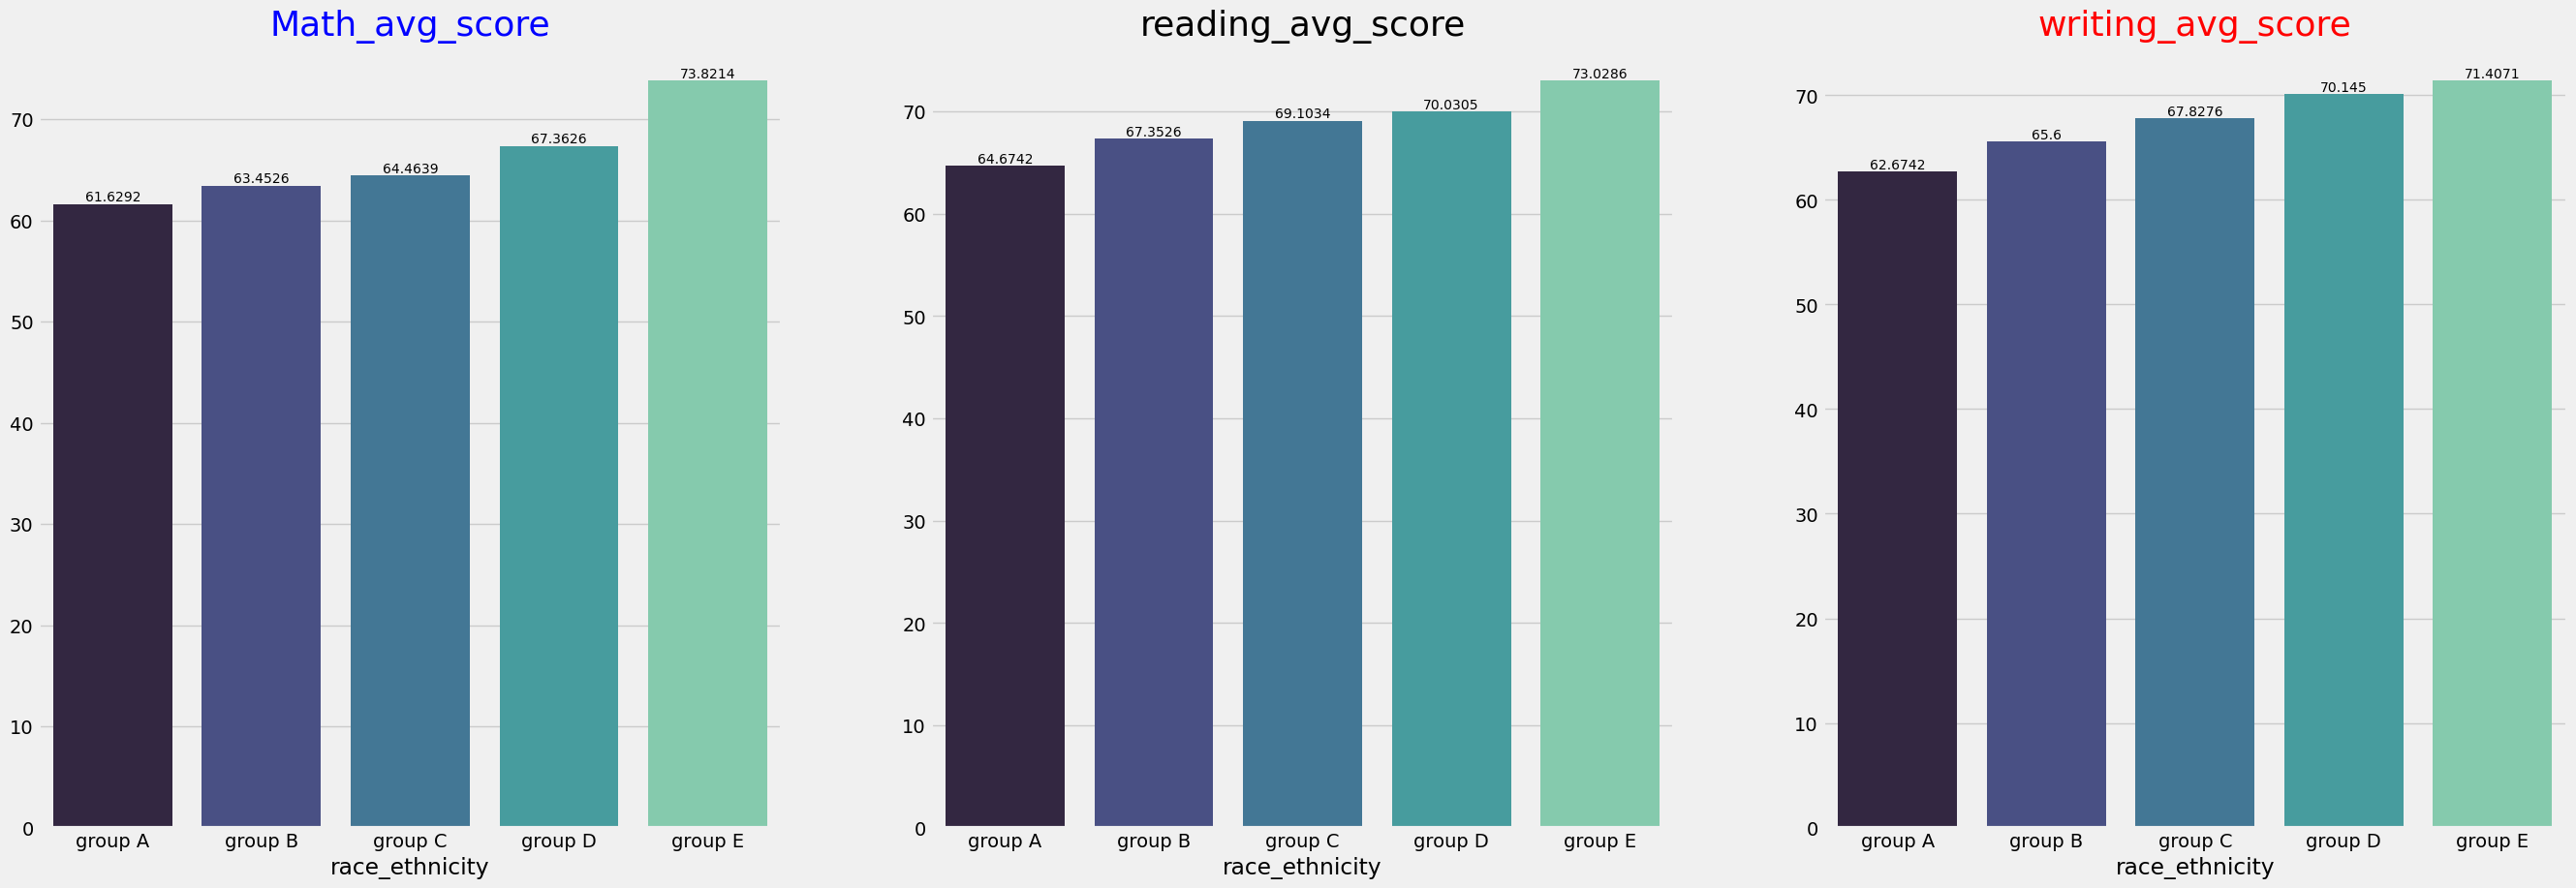

In [107]:
f , ax = plt.subplots(1 , 3 , figsize = (30 , 10))
sns.barplot(x = group_group['math_score'].index , data = group_group , ax = ax[0] , y = group_group['math_score'].values , palette='mako')
ax[0].set_title('Math_avg_score' , color = 'blue' , size = 26)
for container in ax[0].containers:
    ax[0].bar_label(container , color= 'black' , size = 10)


sns.barplot(x = group_group['reading_score'].index , y = group_group['reading_score'].values , data = group_group , ax = ax[1] , palette='mako')
ax[1].set_title('reading_avg_score' , color = 'black' , size = 26)
for container in ax[1].containers:
    ax[1].bar_label(container , color = 'black' , size = 10)


sns.barplot(x = group_group['writing_score'].index , y = group_group['writing_score'].values , data = group_group , ax = ax[2] , palette='mako')
ax[2].set_title('writing_avg_score' , color = 'red' , size = 26)
for container in ax[2].containers:
    ax[2].bar_label(container , color = 'black' , size = 10)

plt.show()

### Insights 

- there is no big difference in student's marks according to their group 
- but it is better if student is from group E because in every case they perform well and group A score least
- also as group increase average marks also increase 


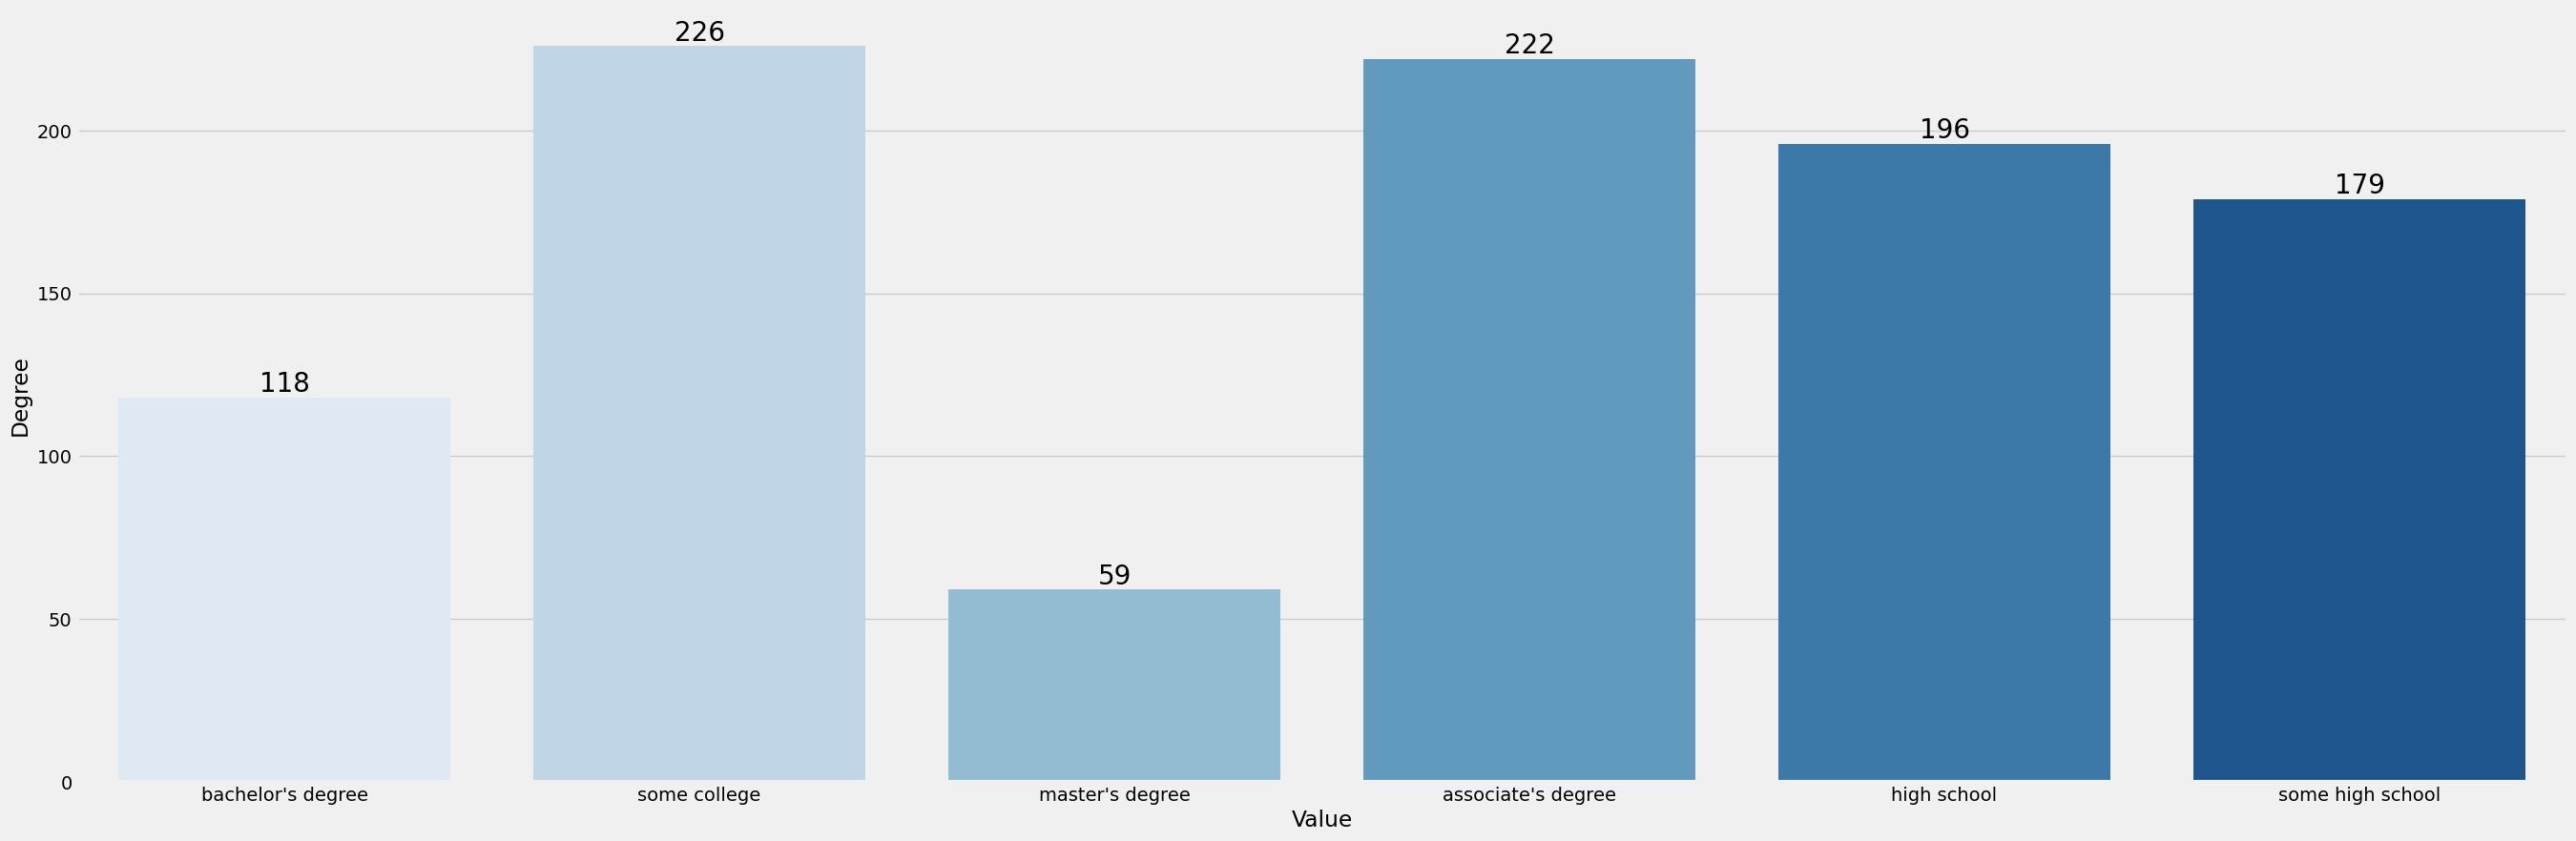

In [111]:
fig , ax = plt.subplots(1 , 1 , figsize = (30 , 10 ))
plt.style.use('fivethirtyeight')
sns.countplot(x = df['parental_level_of_education'] , palette='Blues' , ax = ax)
for container in ax.containers:
    ax.bar_label(container , color = 'black' , size = 20)
plt.xlabel('Value')
plt.ylabel('Degree')
plt.show()

### Insights 

- as we can see here most number of parental level of education is some college followed by associate's college


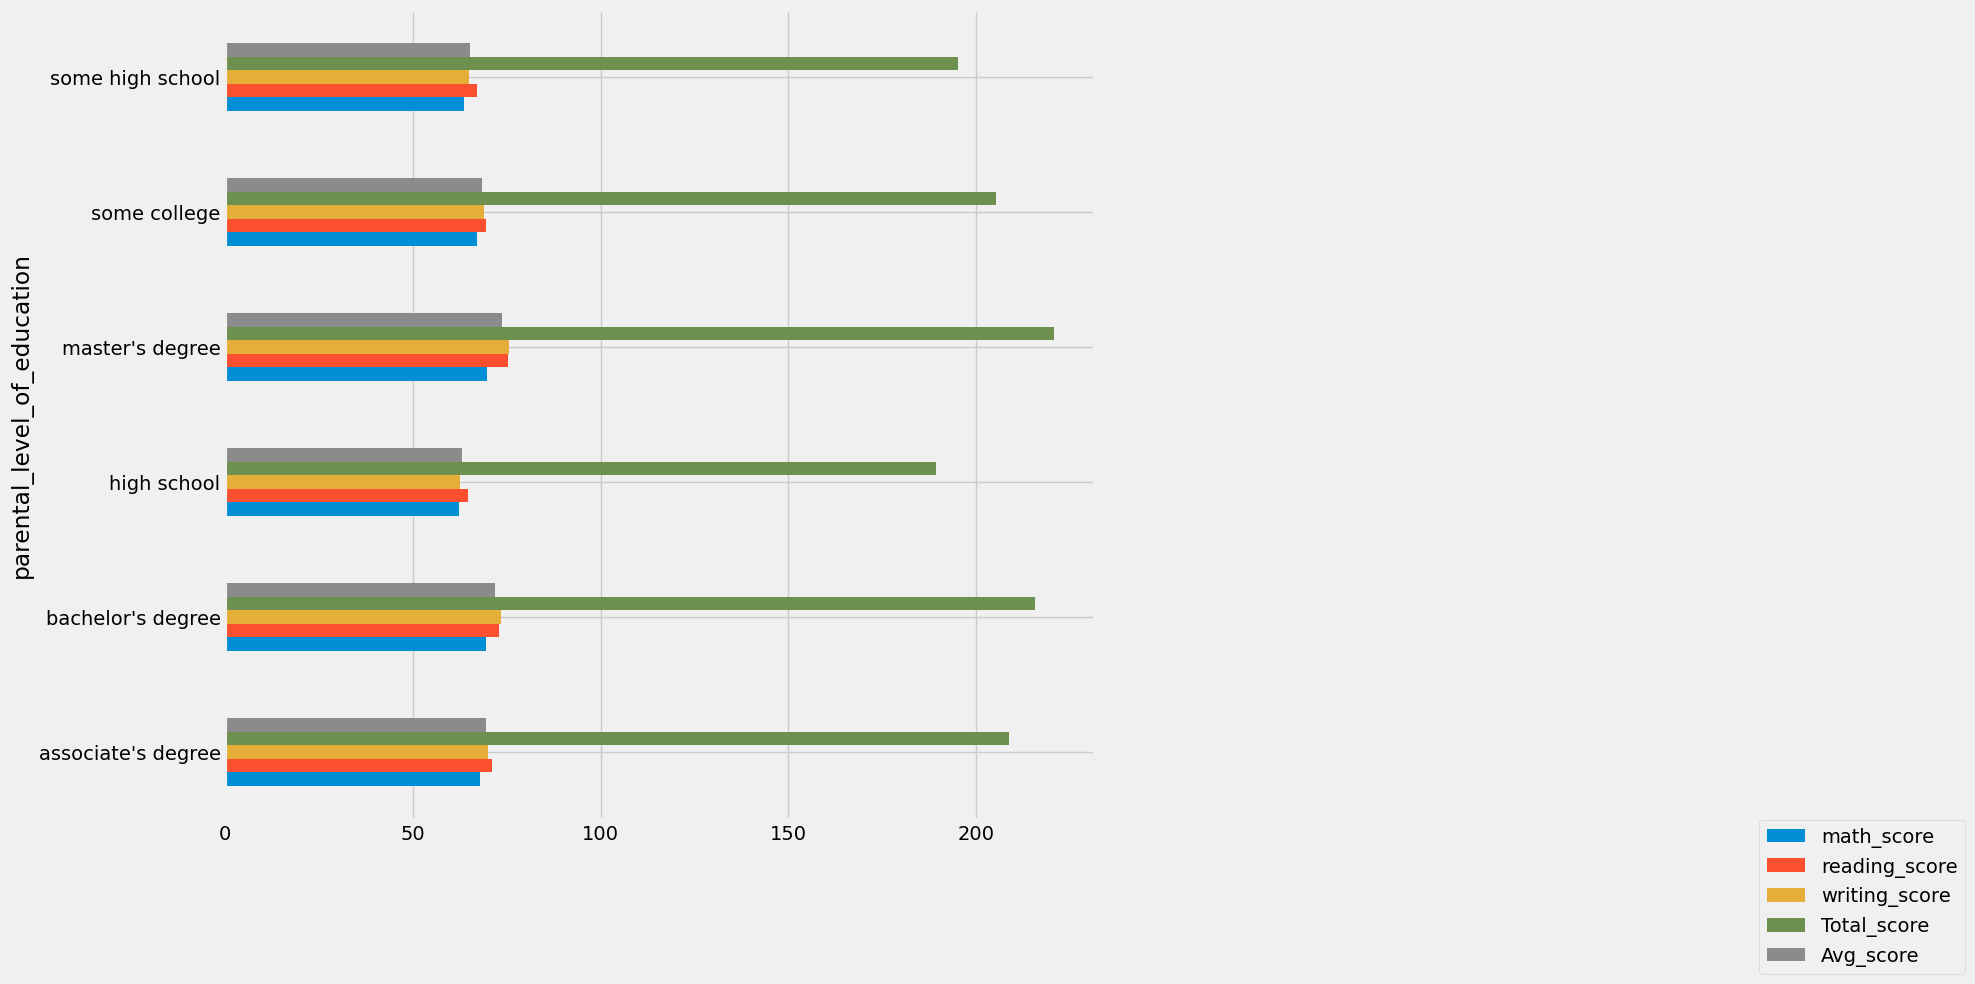

In [123]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind = 'barh' , figsize = (10 , 10))
plt.legend(bbox_to_anchor=(2, 0), loc=1, borderaxespad=0.)
plt.show()

### insights 

- students whose parent's education is master or bachelor is getting higher marks than other 


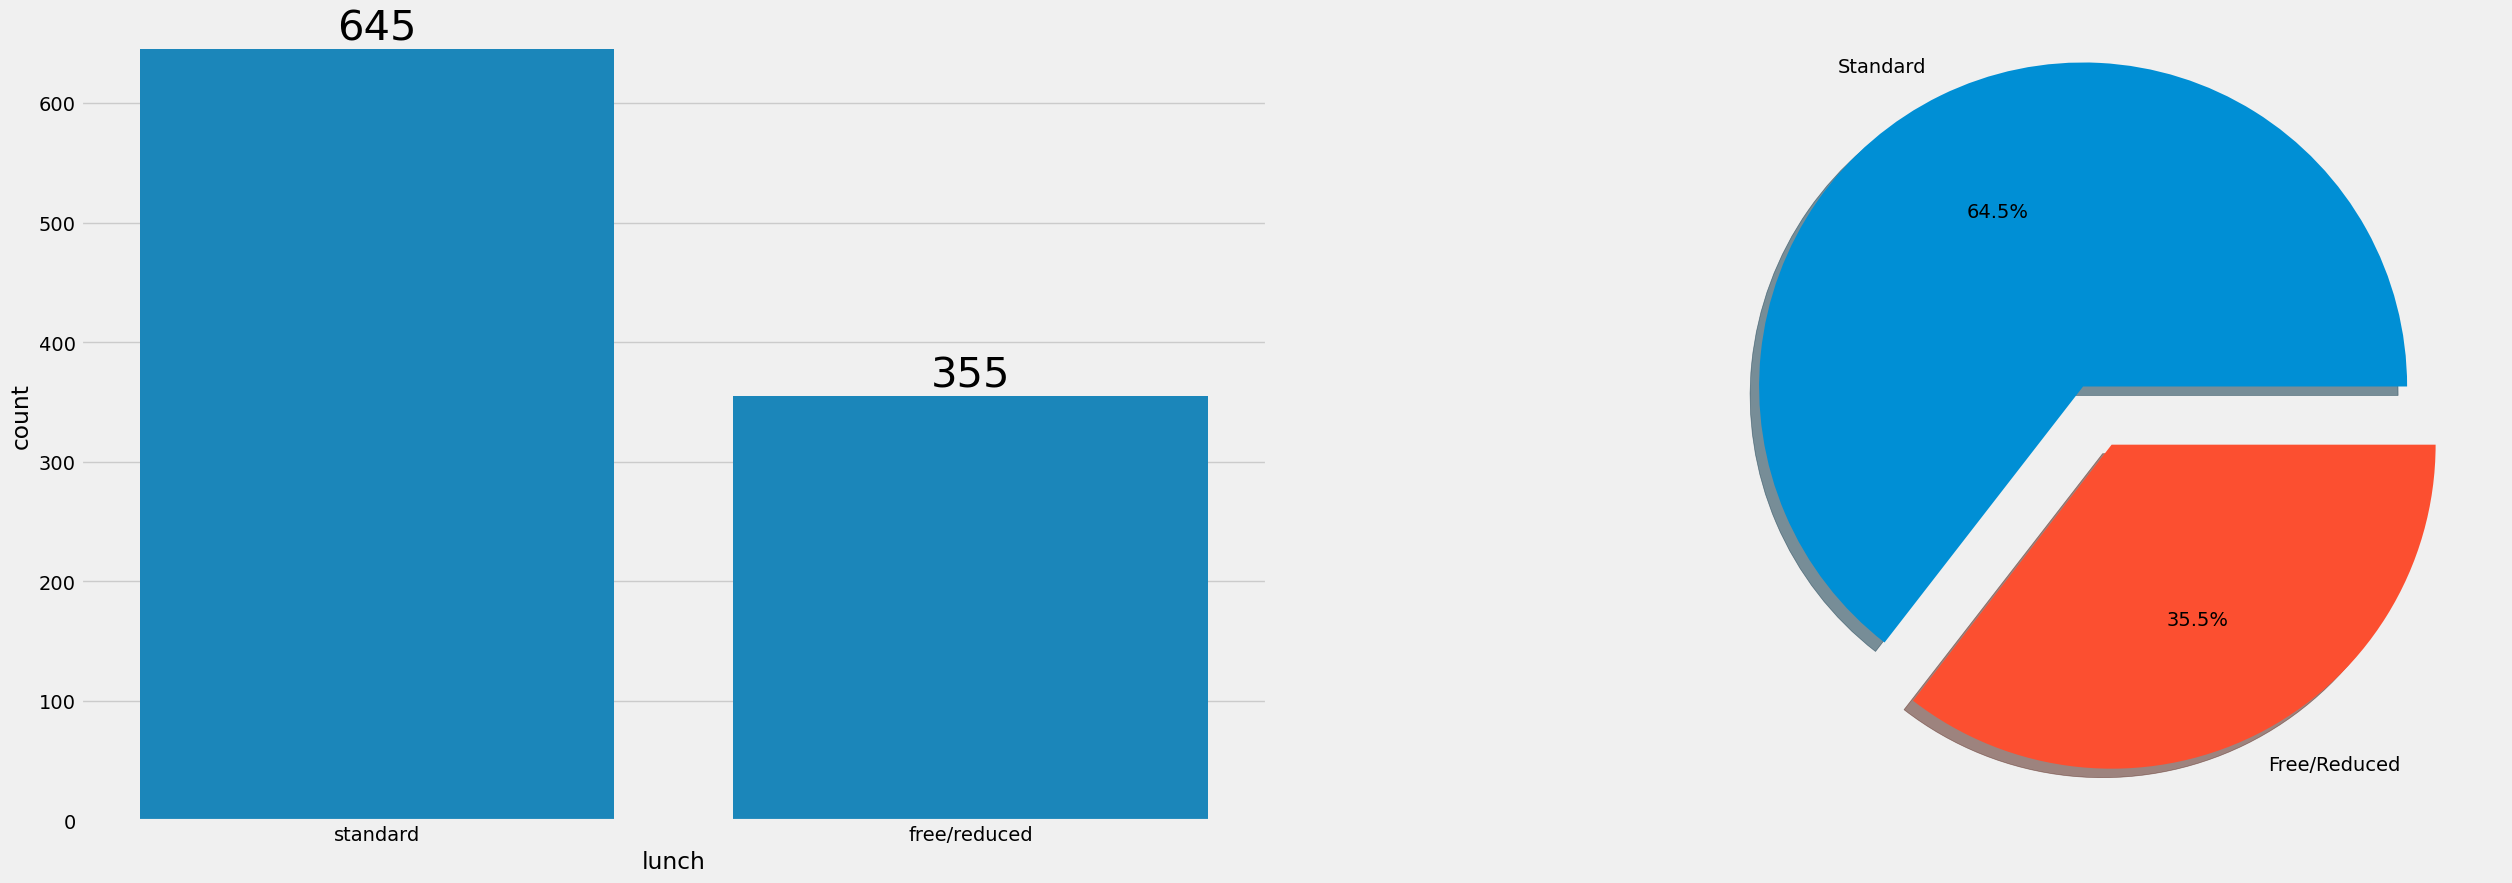

In [139]:
fig , ax = plt.subplots( 1,2, figsize = (30 , 10))
group_lunch = df.groupby('lunch').mean(numeric_only=True)

sns.countplot(x = df['lunch'] , data = df , ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container , color = 'black' , size = 30)

ax[1].pie(x = df['lunch'].value_counts() , autopct = "%1.1f%%" , shadow = True , explode = [0.1 , 0.1] , labels = ['Standard' , 'Free/Reduced'])
plt.show()



### Insights
- here we can see standar lunch have higher student taken

In [140]:
group_lunch

,math_score,reading_score,writing_score,Total_score,Avg_score
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


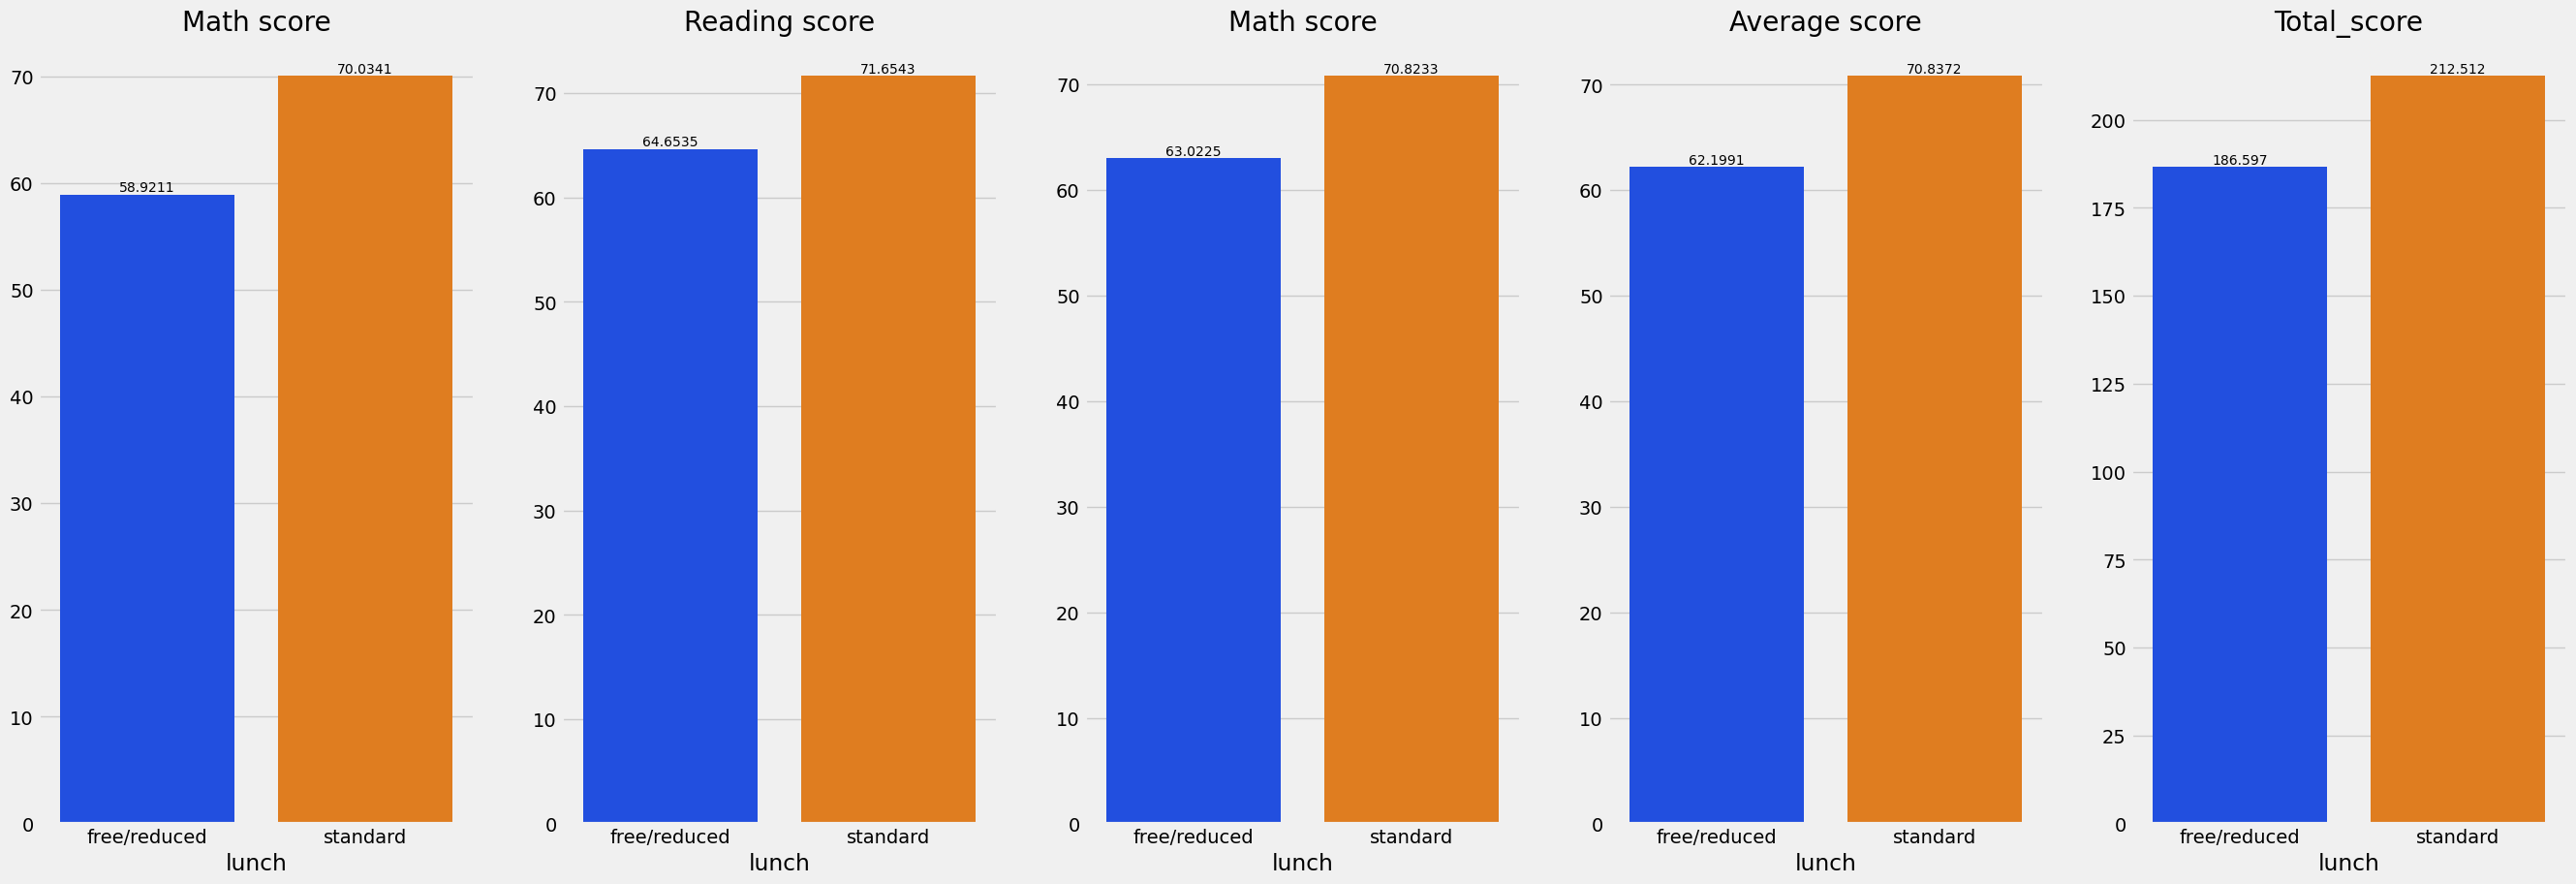

In [145]:
fig , ax = plt.subplots(1 , 5 , figsize = (30, 10))
sns.barplot(x =group_lunch['math_score'].index , y = group_lunch['math_score'].values ,data = group_lunch  , ax = ax[0] , palette='bright')
ax[0].set_title('Math score' , color = 'black')
for container in ax[0].containers:
    ax[0].bar_label(container , color = 'black' , size = 10)



sns.barplot(x =group_lunch['reading_score'].index , y = group_lunch['reading_score'].values ,data = group_lunch  , ax = ax[1] , palette='bright')
ax[1].set_title('Reading score' , color = 'black')
for container in ax[1].containers:
    ax[1].bar_label(container , color = 'black' , size = 10)


sns.barplot(x =group_lunch['writing_score'].index , y = group_lunch['writing_score'].values ,data = group_lunch  , ax = ax[2] , palette='bright')
ax[2].set_title('Math score' , color = 'black')
for container in ax[2].containers:
    ax[2].bar_label(container , color = 'black' , size = 10)


sns.barplot(x =group_lunch['Avg_score'].index , y = group_lunch['Avg_score'].values ,data = group_lunch  , ax = ax[3] , palette='bright')
ax[3].set_title('Average score' , color = 'black')
for container in ax[3].containers:
    ax[3].bar_label(container , color = 'black' , size = 10)


sns.barplot(x =group_lunch['Total_score'].index , y = group_lunch['Total_score'].values ,data = group_lunch  , ax = ax[4] , palette='bright')
ax[4].set_title('Total_score' , color = 'black')
for container in ax[4].containers:
    ax[4].bar_label(container , color = 'black' , size = 10)


plt.show()


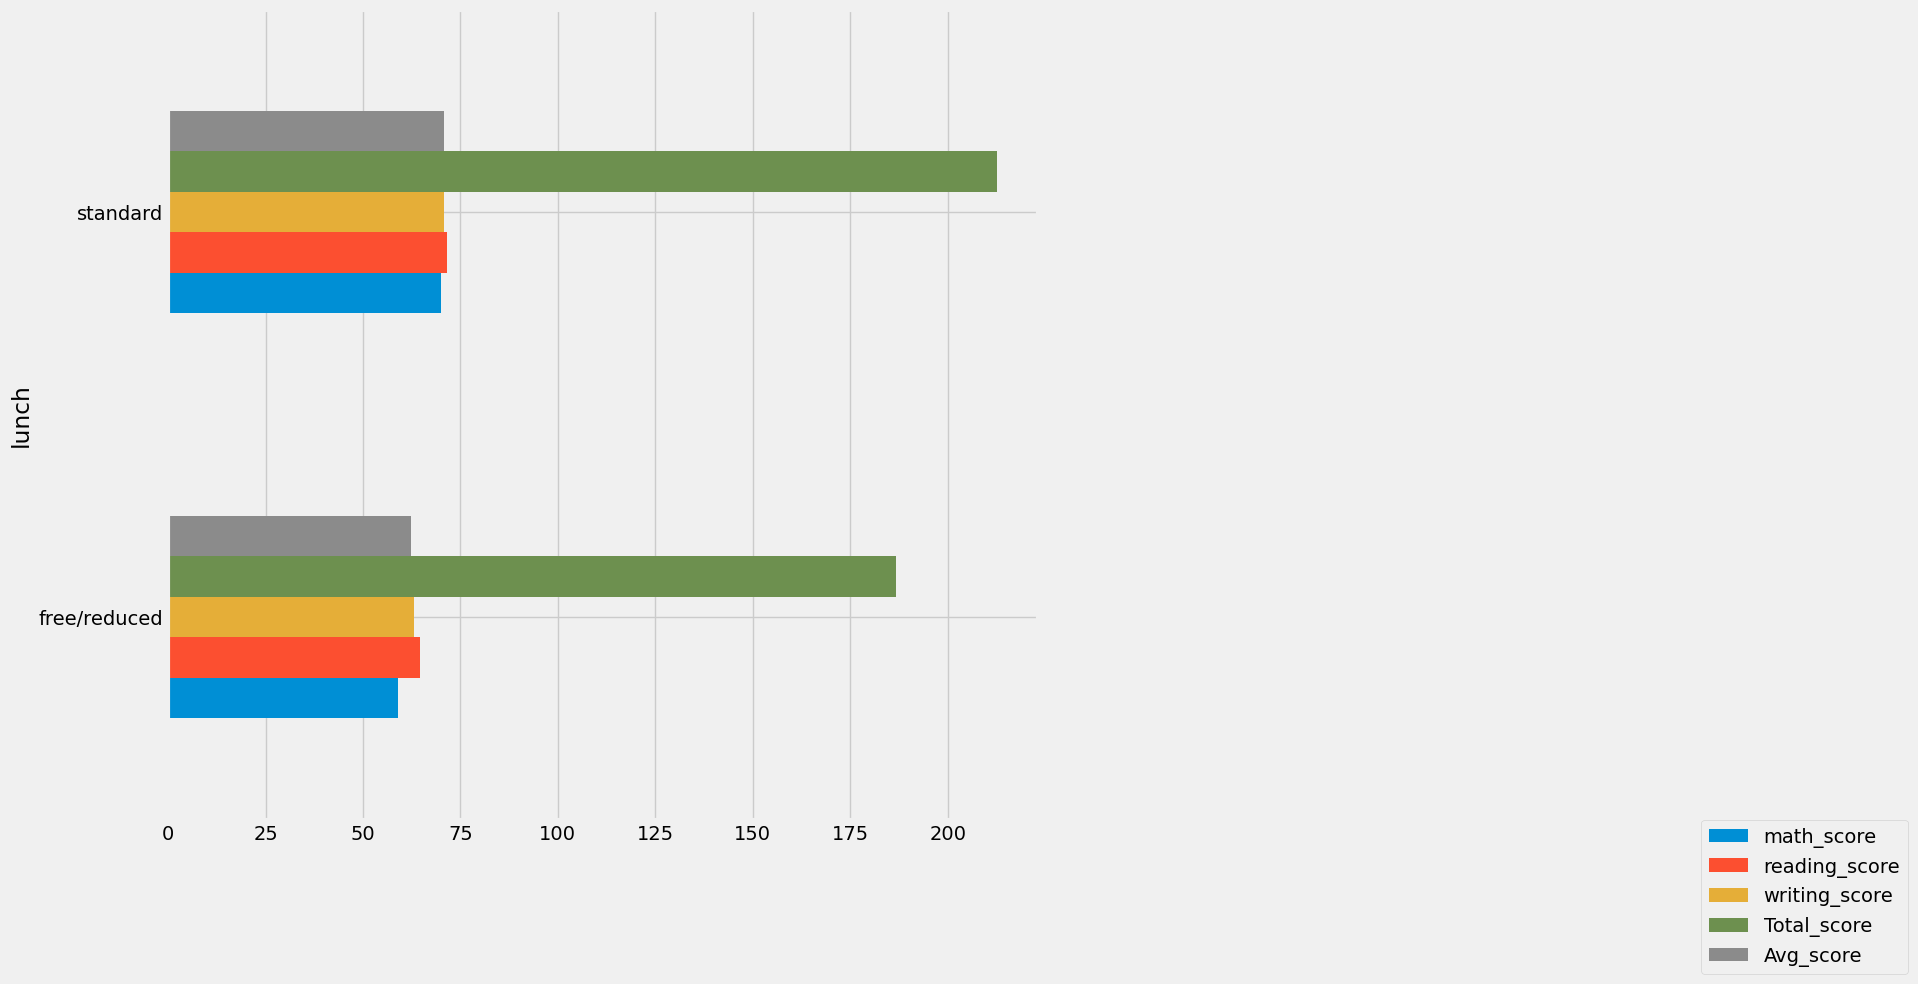

In [141]:
df.groupby('lunch').mean(numeric_only=True).plot(kind = 'barh' , figsize = (10 , 10))
plt.legend(bbox_to_anchor=(2, 0), loc=1, borderaxespad=0.)
plt.show()

### Insights 

- as we can see here standard lunch students are performing well in everything 

<Axes: xlabel='lunch', ylabel='writing_score'>

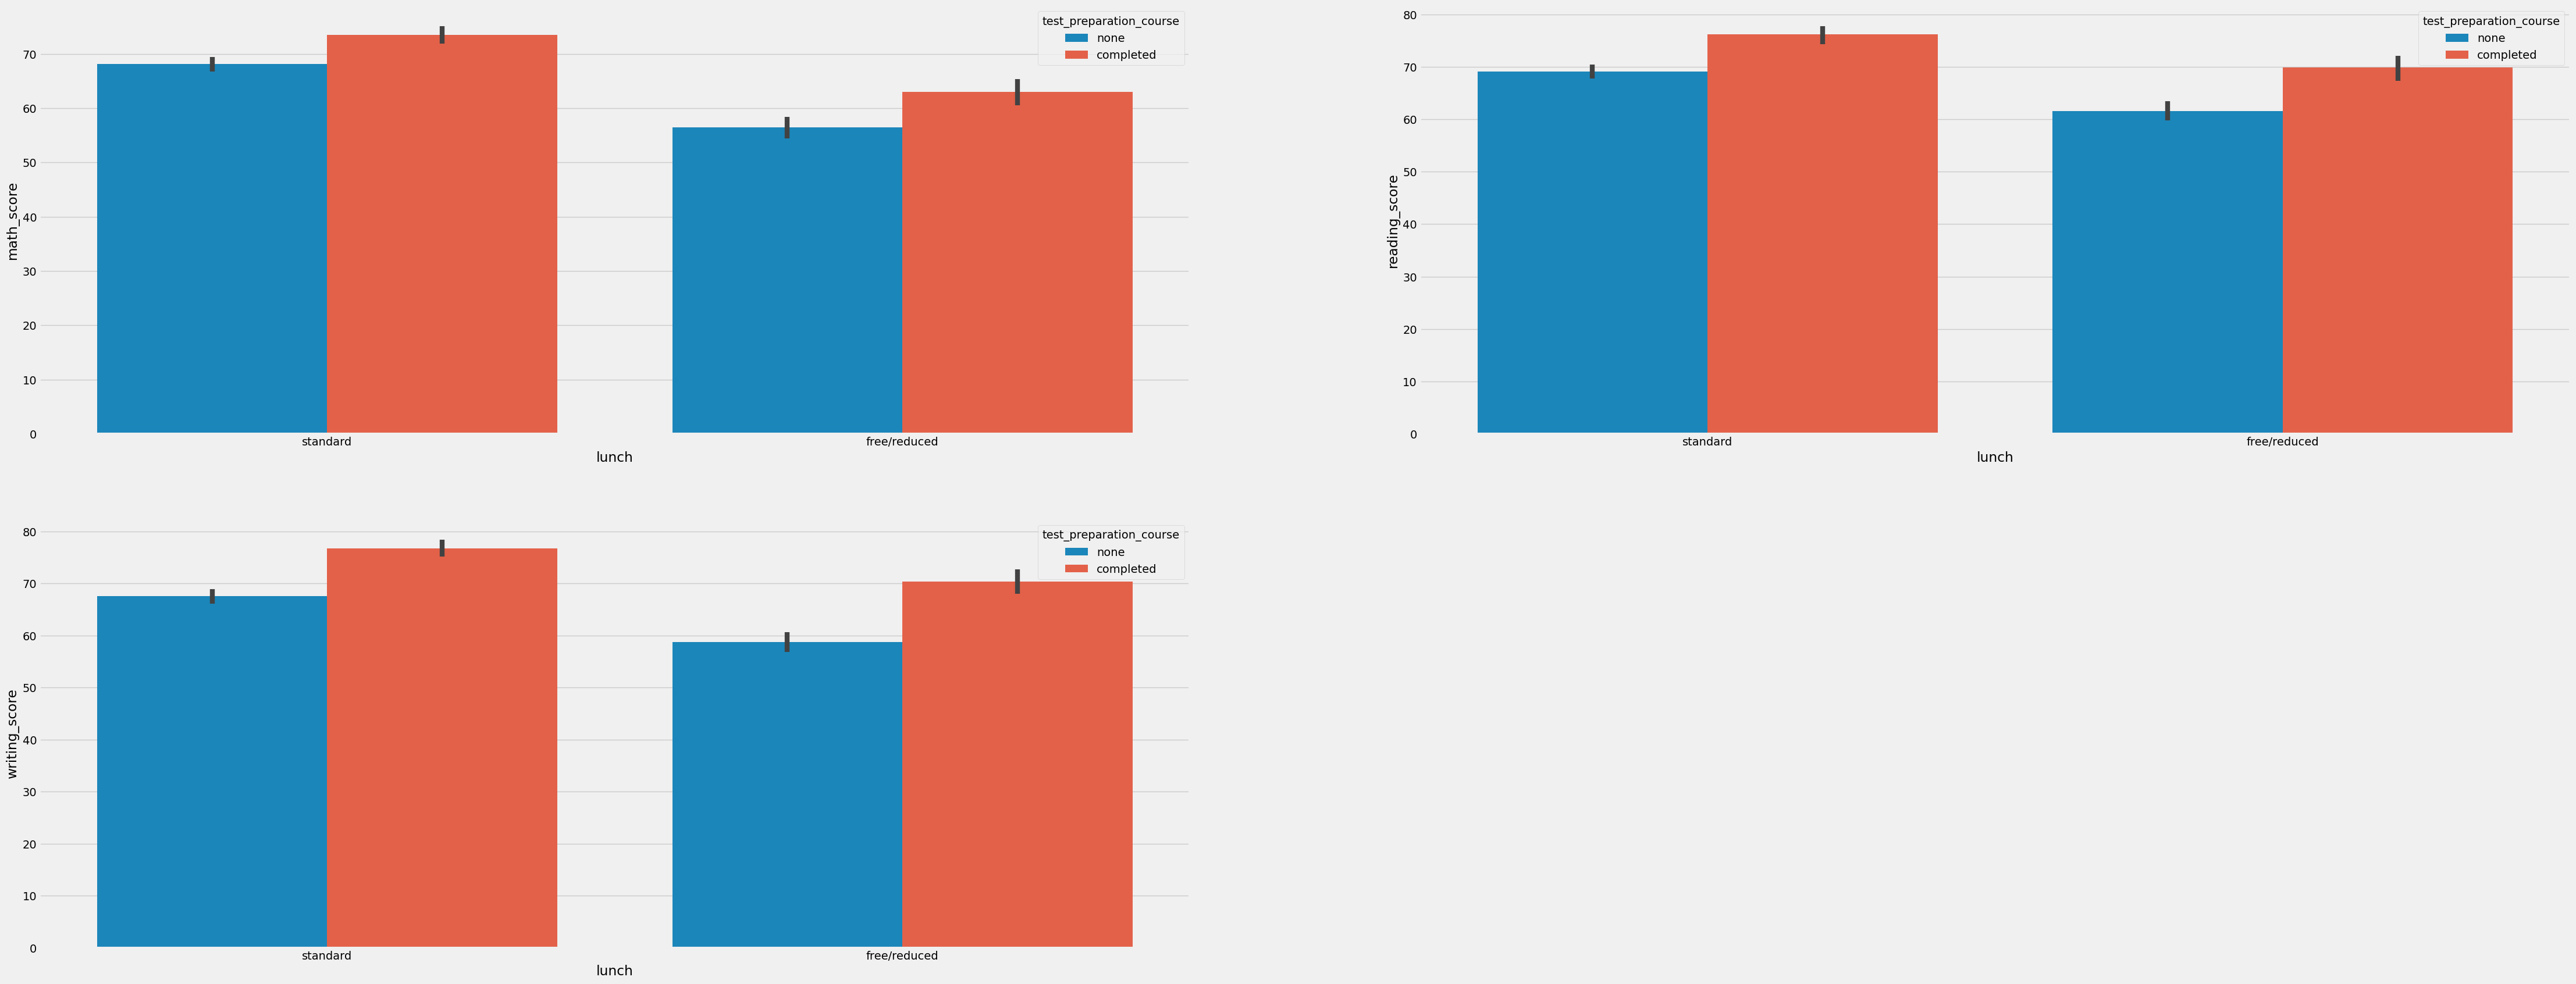

In [150]:
plt.figure(figsize=(50,20))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

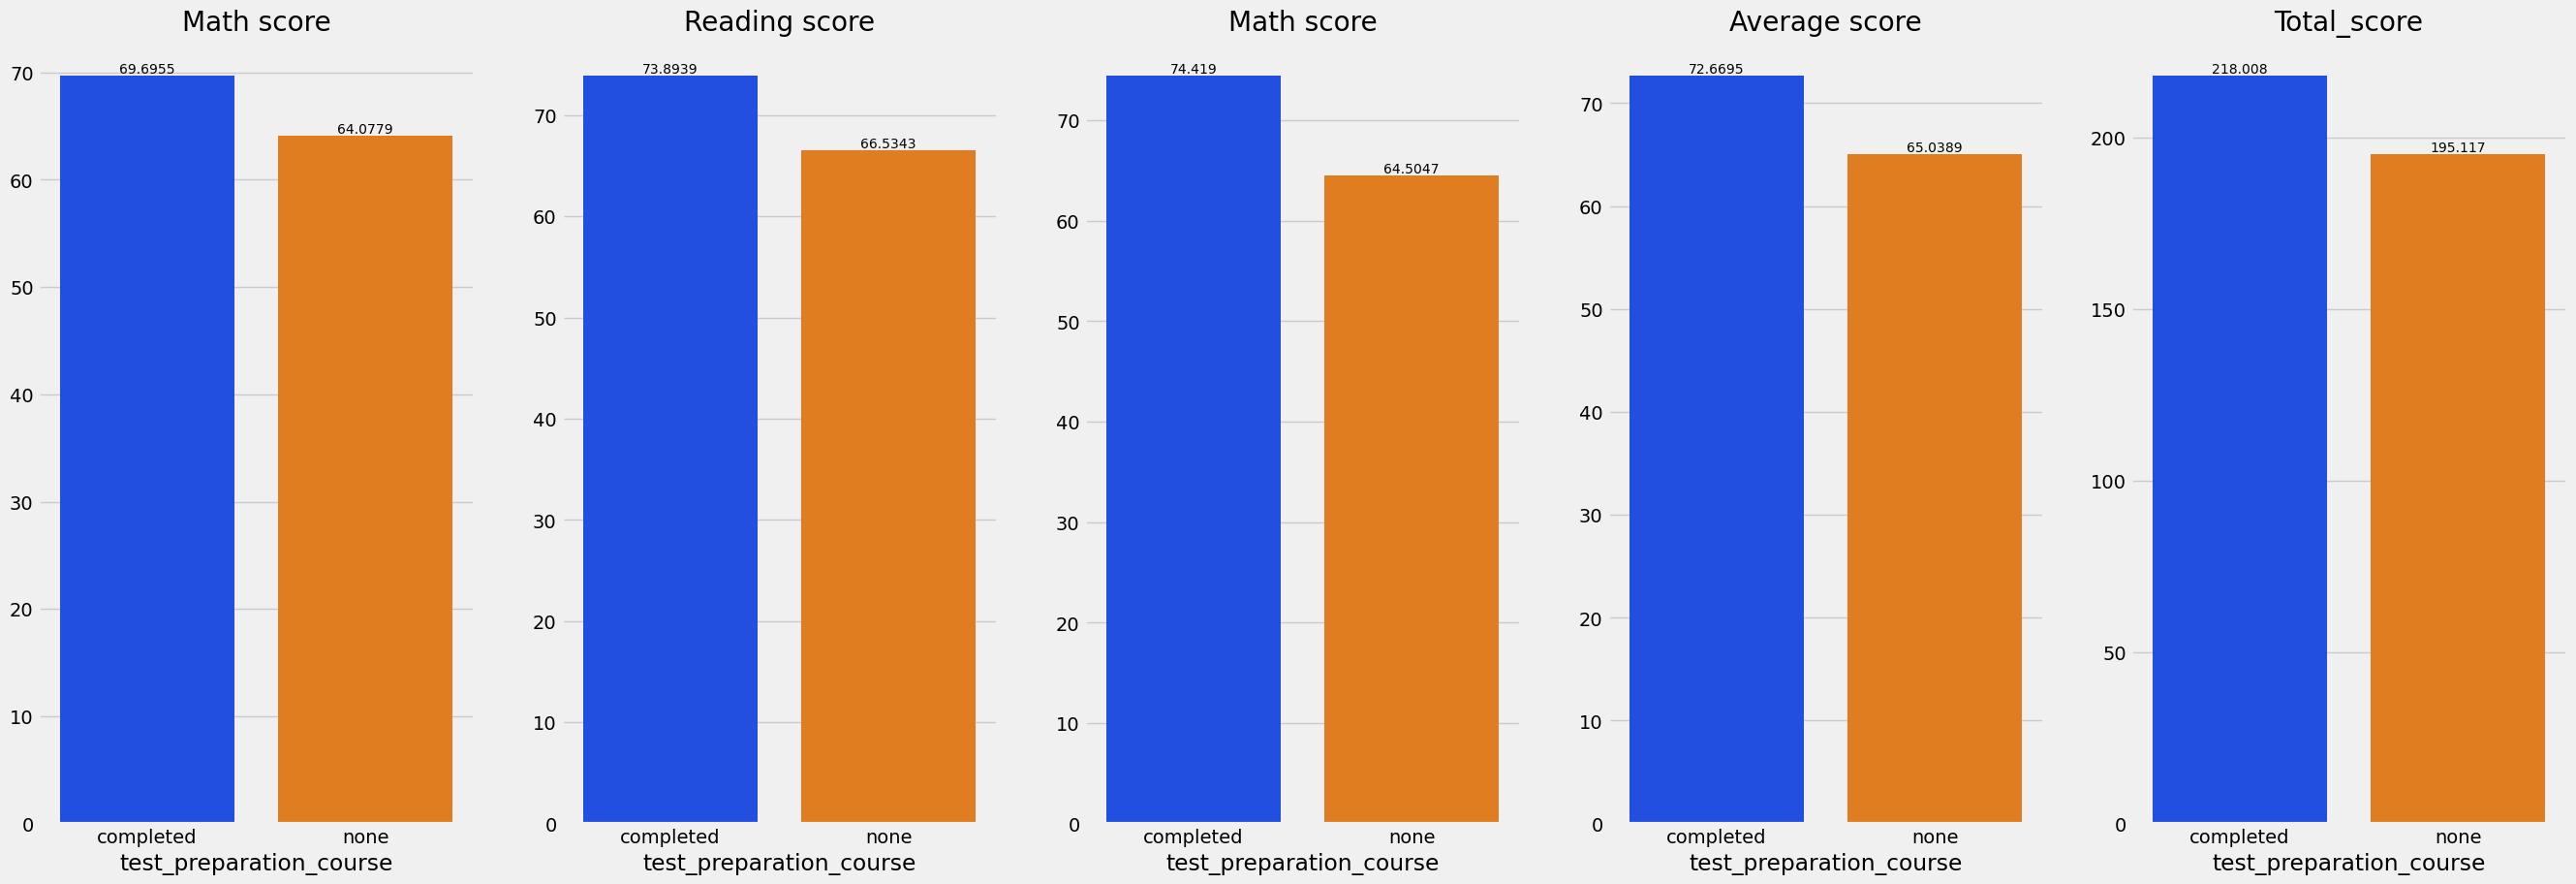

In [ ]:
group_test = df.groupby('test_preparation_course').mean(numeric_only=True)
fig , ax = plt.subplots(1 , 5 , figsize = (30, 10))
sns.barplot(x =group_test['math_score'].index , y = group_test['math_score'].values ,data = group_test  , ax = ax[0] , palette='bright' , hue = )
ax[0].set_title('Math score' , color = 'black')
for container in ax[0].containers:
    ax[0].bar_label(container , color = 'black' , size = 10)



sns.barplot(x =group_test['reading_score'].index , y = group_test['reading_score'].values ,data = group_test  , ax = ax[1] , palette='bright')
ax[1].set_title('Reading score' , color = 'black')
for container in ax[1].containers:
    ax[1].bar_label(container , color = 'black' , size = 10)


sns.barplot(x =group_test['writing_score'].index , y = group_test['writing_score'].values ,data = group_test  , ax = ax[2] , palette='bright')
ax[2].set_title('Math score' , color = 'black')
for container in ax[2].containers:
    ax[2].bar_label(container , color = 'black' , size = 10)


sns.barplot(x =group_test['Avg_score'].index , y = group_test['Avg_score'].values ,data = group_test  , ax = ax[3] , palette='bright')
ax[3].set_title('Average score' , color = 'black')
for container in ax[3].containers:
    ax[3].bar_label(container , color = 'black' , size = 10)


sns.barplot(x =group_test['Total_score'].index , y = group_test['Total_score'].values ,data = group_test  , ax = ax[4] , palette='bright')
ax[4].set_title('Total_score' , color = 'black')
for container in ax[4].containers:
    ax[4].bar_label(container , color = 'black' , size = 10)


plt.show()


### Insights 

- if course is complete students perform well in exam 

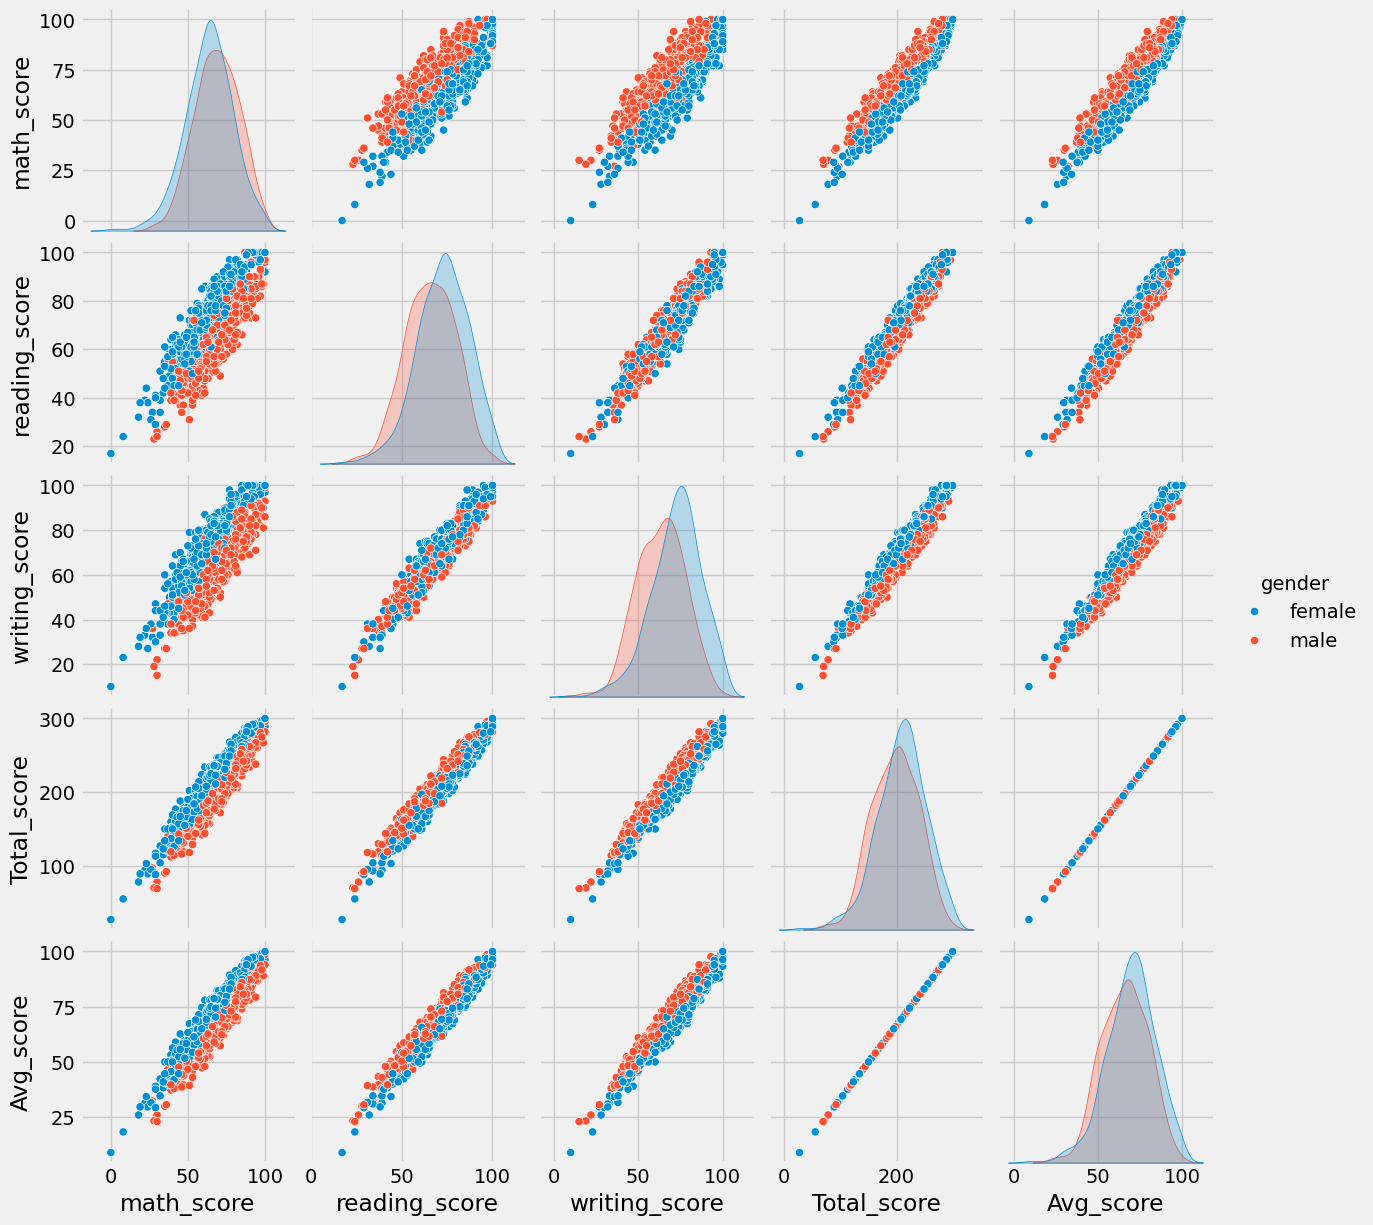

In [152]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Insights 

- all score increase linearly with gender 

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [4]:
custome_data_input_dict = {
                'gender' : [10],
                'race_ethnicity' :[10],
                'parental_level_of_education':[10],
                'lunch' :[10],
                'test_preparation_course': [10],
                'reading_score' : [10],
                'writing_score' :[10]
            }
import pandas as pd 
df = pd.DataFrame(custome_data_input_dict)

In [5]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,10,10,10,10,10,10,10
